In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
import pickle

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')

print("Libraries berhasil diimport")

Libraries berhasil diimport


In [70]:
# Set random seed untuk reproducibility
np.random.seed(42)

# Parameter dataset
n_samples = 200
train_size = 0.7
test_size = 0.3

print(f"Random seed: 42")
print(f"Jumlah sampel: {n_samples}")
print(f"Training size: {train_size*100}%")
print(f"Testing size: {test_size*100}%")

Random seed: 42
Jumlah sampel: 200
Training size: 70.0%
Testing size: 30.0%


In [72]:
# Generate features
luas_tanah = np.random.uniform(50, 500, n_samples)
luas_bangunan = np.random.uniform(30, 400, n_samples)

# Pastikan luas bangunan tidak melebihi luas tanah (realistis)
luas_bangunan = np.minimum(luas_bangunan, luas_tanah * 0.8)

jumlah_kamar = np.random.randint(1, 6, n_samples)
umur_bangunan = np.random.uniform(0, 30, n_samples)
jarak_pusat_kota = np.random.uniform(1, 20, n_samples)

print("Features berhasil digenerate:")
print(f"  - Luas Tanah: {luas_tanah.min():.1f} - {luas_tanah.max():.1f} m²")
print(f"  - Luas Bangunan: {luas_bangunan.min():.1f} - {luas_bangunan.max():.1f} m²")
print(f"  - Jumlah Kamar: {jumlah_kamar.min()} - {jumlah_kamar.max()}")
print(f"  - Umur Bangunan: {umur_bangunan.min():.1f} - {umur_bangunan.max():.1f} tahun")
print(f"  - Jarak Pusat Kota: {jarak_pusat_kota.min():.1f} - {jarak_pusat_kota.max():.1f} km")

Features berhasil digenerate:
  - Luas Tanah: 50.1 - 499.7 m²
  - Luas Bangunan: 30.4 - 388.0 m²
  - Jumlah Kamar: 1 - 5
  - Umur Bangunan: 0.2 - 29.8 tahun
  - Jarak Pusat Kota: 1.2 - 19.9 km


In [74]:
# Generate Target (Harga) dengan Hubungan Non-Linear
# Formula kompleks yang mencerminkan hubungan real-world
# dengan polynomial terms dan interaksi features

# Base price dari luas
harga_base = (
    # Luas tanah dengan diminishing returns (polynomial)
    3.5 * luas_tanah + 0.008 * luas_tanah**2 - 0.00001 * luas_tanah**3 +

    # Luas bangunan (lebih berpengaruh dari tanah)
    8 * luas_bangunan + 0.015 * luas_bangunan**2 - 0.00002 * luas_bangunan**3 +

    # Jumlah kamar (non-linear, premium untuk 4-5 kamar)
    150 * jumlah_kamar + 50 * jumlah_kamar**2 +

    # Umur bangunan (depresiasi non-linear, lebih cepat di awal)
    -25 * umur_bangunan - 2 * umur_bangunan**1.5 +

    # Jarak ke pusat kota (exponential decay)
    -100 * jarak_pusat_kota - 15 * jarak_pusat_kota**1.5 +

    # Interaksi features (realistic interactions)
    0.05 * luas_bangunan * jumlah_kamar +  # Bangunan luas dengan banyak kamar = premium
    -0.3 * luas_bangunan * umur_bangunan +  # Bangunan luas tua = depresiasi lebih besar
    -5 * jarak_pusat_kota * umur_bangunan  # Jauh dan tua = harga lebih rendah
)

# Tambahkan konstanta dan noise realistis
harga = harga_base + 800 + np.random.normal(0, 150, n_samples)

# Pastikan harga dalam range yang wajar (200 - 5000 juta)
harga = np.clip(harga, 200, 5000)

print("Target (Harga) berhasil digenerate dengan hubungan non-linear")
print(f"  - Range harga: {harga.min():.1f} - {harga.max():.1f} juta Rp")
print(f"  - Mean harga: {harga.mean():.1f} juta Rp")
print(f"  - Std harga: {harga.std():.1f} juta Rp")

Target (Harga) berhasil digenerate dengan hubungan non-linear
  - Range harga: 200.0 - 5000.0 juta Rp
  - Mean harga: 1618.8 juta Rp
  - Std harga: 1482.5 juta Rp


In [75]:
# Buat DataFrame
df = pd.DataFrame({
    'luas_tanah': luas_tanah.round(1),
    'luas_bangunan': luas_bangunan.round(1),
    'jumlah_kamar': jumlah_kamar,
    'umur_bangunan': umur_bangunan.round(1),
    'jarak_pusat_kota': jarak_pusat_kota.round(1),
    'harga': harga.round(1)
})

print("="*70)
print("DATASET HARGA PROPERTI")
print("="*70)
print(f"\nJumlah sampel: {len(df)}")
print(f"Jumlah features: {len(df.columns) - 1}")
print(f"\nNama kolom:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

DATASET HARGA PROPERTI

Jumlah sampel: 200
Jumlah features: 5

Nama kolom:
  1. luas_tanah
  2. luas_bangunan
  3. jumlah_kamar
  4. umur_bangunan
  5. jarak_pusat_kota
  6. harga


In [76]:
#Statistik Deskriptif
print("\n" + "="*70)
print("STATISTIK DESKRIPTIF")
print("="*70)
print(df.describe().round(2))


STATISTIK DESKRIPTIF
       luas_tanah  luas_bangunan  jumlah_kamar  umur_bangunan  \
count      200.00         200.00        200.00         200.00   
mean       281.38         155.90          2.95          15.03   
std        135.43          90.54          1.47           8.63   
min         50.10          30.40          1.00           0.20   
25%        171.10          77.12          2.00           7.25   
50%        285.10         140.50          3.00          15.60   
75%        392.92         218.85          4.00          22.25   
max        499.70         388.00          5.00          29.80   

       jarak_pusat_kota    harga  
count            200.00   200.00  
mean              10.45  1618.82  
std                5.54  1486.25  
min                1.20   200.00  
25%                5.45   200.00  
50%               10.70  1221.75  
75%               15.05  2639.62  
max               19.90  5000.00  


In [77]:
# Preview Data
print("\n" + "="*70)
print("10 DATA PERTAMA")
print("="*70)
print(df.head(10))

print("\n" + "="*70)
print("10 DATA TERAKHIR")
print("="*70)
print(df.tail(10))


10 DATA PERTAMA
   luas_tanah  luas_bangunan  jumlah_kamar  umur_bangunan  jarak_pusat_kota  \
0       113.0           90.4             5           25.9              11.4   
1       168.7          134.9             4           15.6              19.4   
2       169.9          120.8             4           14.4               9.2   
3       379.5           88.2             4            0.8               6.9   
4       162.8           89.3             4           10.2              10.6   
5       334.9          153.6             4           11.4               9.4   
6       272.4          118.3             2           12.0               3.0   
7       308.0          246.4             1           17.4              13.2   
8       427.1           69.2             3           16.0               5.1   
9       232.0          185.6             1           18.2              12.8   

    harga  
0   200.0  
1   200.0  
2  1132.4  
3  4122.7  
4  1043.4  
5  2313.5  
6  2340.0  
7   239.9  
8  26

In [78]:
# Informasi Dataset
print("\n" + "="*70)
print("INFORMASI DATASET")
print("="*70)
print(df.info())

print("\n" + "="*70)
print("CEK MISSING VALUES")
print("="*70)
print(df.isnull().sum())


INFORMASI DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   luas_tanah        200 non-null    float64
 1   luas_bangunan     200 non-null    float64
 2   jumlah_kamar      200 non-null    int64  
 3   umur_bangunan     200 non-null    float64
 4   jarak_pusat_kota  200 non-null    float64
 5   harga             200 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 9.5 KB
None

CEK MISSING VALUES
luas_tanah          0
luas_bangunan       0
jumlah_kamar        0
umur_bangunan       0
jarak_pusat_kota    0
harga               0
dtype: int64


In [92]:
# EXPLORATORY DATA ANALYSIS - Statistical Summary
print("\n" + "="*80)
print(" "*20 + "EXPLORATORY DATA ANALYSIS (EDA)")
print("="*80)
print("\n1. STATISTICAL SUMMARY (Mean, Std, Min, Max)")
print("-" * 80)

# Statistical summary
summary_stats = df.describe().T
summary_stats['range'] = summary_stats['max'] - summary_stats['min']
print(summary_stats[['mean', 'std', 'min', 'max', 'range']].round(2))

# Additional statistics
print("\n📊 Additional Statistics:")
print(f"{'Feature':<20} {'Median':<15} {'Variance':<15} {'CV (%)':<15}")
print("-" * 80)
for col in df.columns:
    median = df[col].median()
    variance = df[col].var()
    cv = (df[col].std() / df[col].mean() * 100) if df[col].mean() != 0 else 0
    print(f"{col:<20} {median:<15.2f} {variance:<15.2f} {cv:<15.2f}")


                    EXPLORATORY DATA ANALYSIS (EDA)

1. STATISTICAL SUMMARY (Mean, Std, Min, Max)
--------------------------------------------------------------------------------
                     mean      std    min     max   range
luas_tanah         281.38   135.43   50.1   499.7   449.6
luas_bangunan      155.90    90.54   30.4   388.0   357.6
jumlah_kamar         2.95     1.47    1.0     5.0     4.0
umur_bangunan       15.03     8.63    0.2    29.8    29.6
jarak_pusat_kota    10.45     5.54    1.2    19.9    18.7
harga             1618.82  1486.25  200.0  5000.0  4800.0

📊 Additional Statistics:
Feature              Median          Variance        CV (%)         
--------------------------------------------------------------------------------
luas_tanah           285.10          18340.88        48.13          
luas_bangunan        140.50          8196.85         58.07          
jumlah_kamar         3.00            2.15            49.68          
umur_bangunan        15.60     



2. VISUALISASI DISTRIBUSI SETIAP FITUR (HISTOGRAM)
--------------------------------------------------------------------------------


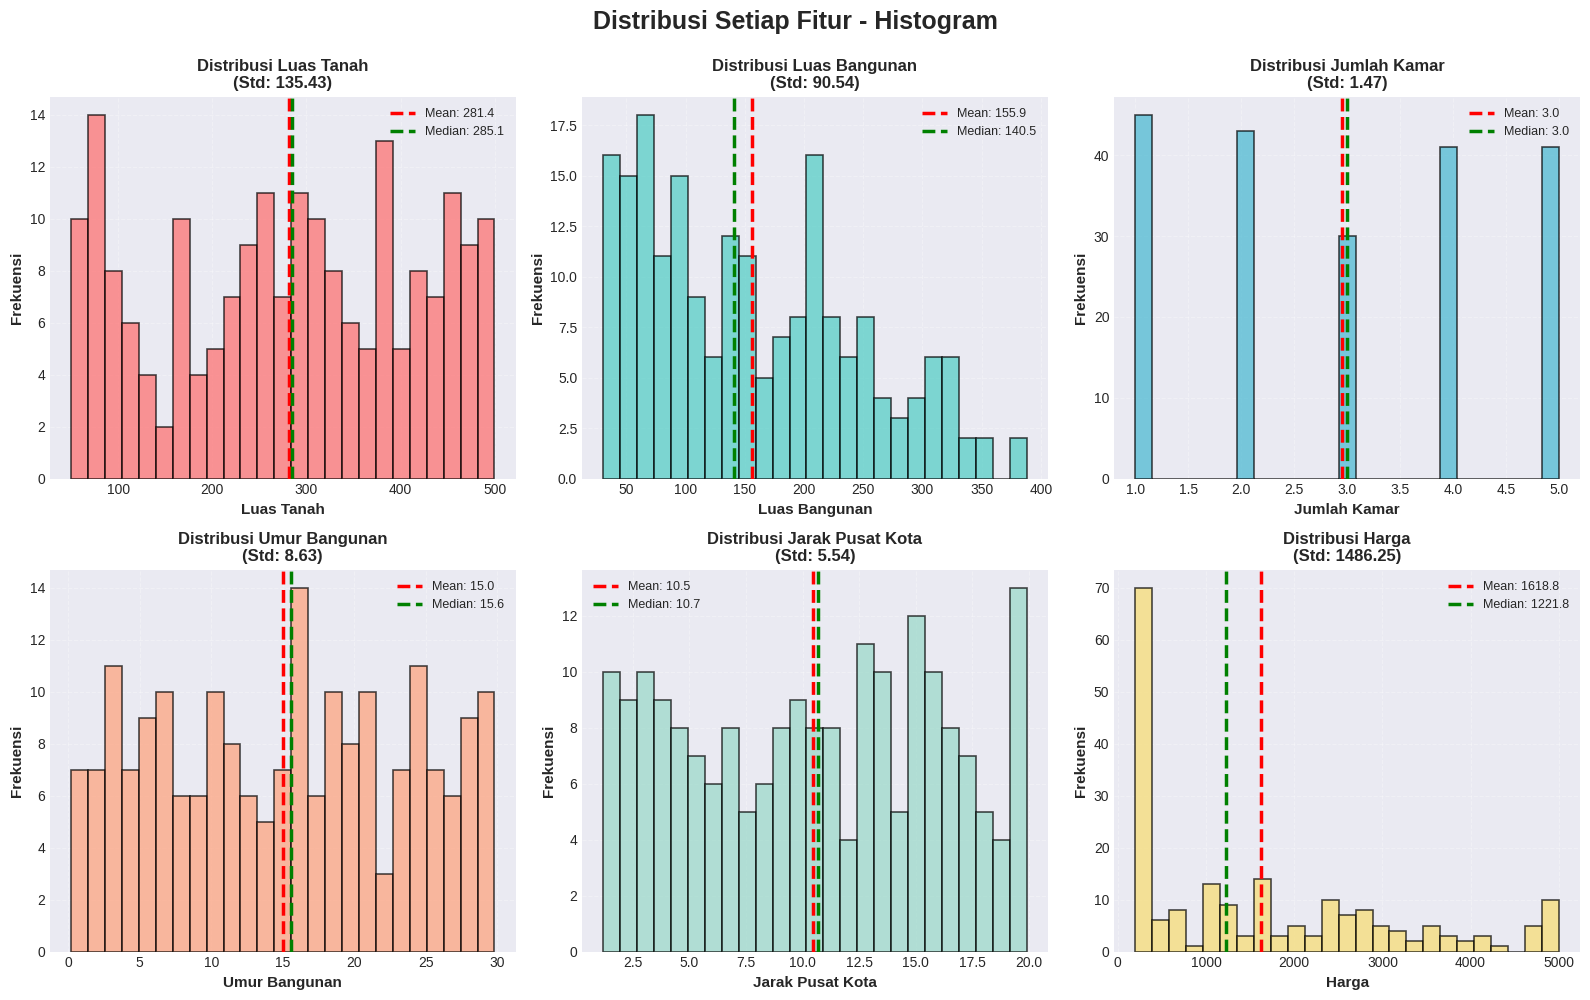

✓ Histogram distribusi setiap fitur berhasil ditampilkan


In [96]:
# EDA - Distribusi Setiap Fitur (Histogram)
print("\n\n2. VISUALISASI DISTRIBUSI SETIAP FITUR (HISTOGRAM)")
print("-" * 80)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribusi Setiap Fitur - Histogram', fontsize=18, fontweight='bold', y=0.995)

features = df.columns
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

for idx, (col, color) in enumerate(zip(features, colors)):
    ax = axes[idx // 3, idx % 3]

    # Histogram
    n, bins, patches = ax.hist(df[col], bins=25, color=color, edgecolor='black',
                                alpha=0.7, linewidth=1.2)

    # Statistik
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()

    # Vertical lines untuk mean dan median
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2.5,
               label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2.5,
               label=f'Median: {median_val:.1f}')

    # Labels dan title
    ax.set_xlabel(col.replace('_', ' ').title(), fontweight='bold', fontsize=11)
    ax.set_ylabel('Frekuensi', fontweight='bold', fontsize=11)
    ax.set_title(f'Distribusi {col.replace("_", " ").title()}\n(Std: {std_val:.2f})',
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=9, loc='best')
    ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()
print("✓ Histogram distribusi setiap fitur berhasil ditampilkan")



3. SCATTER PLOT SETIAP FITUR VS HARGA
--------------------------------------------------------------------------------


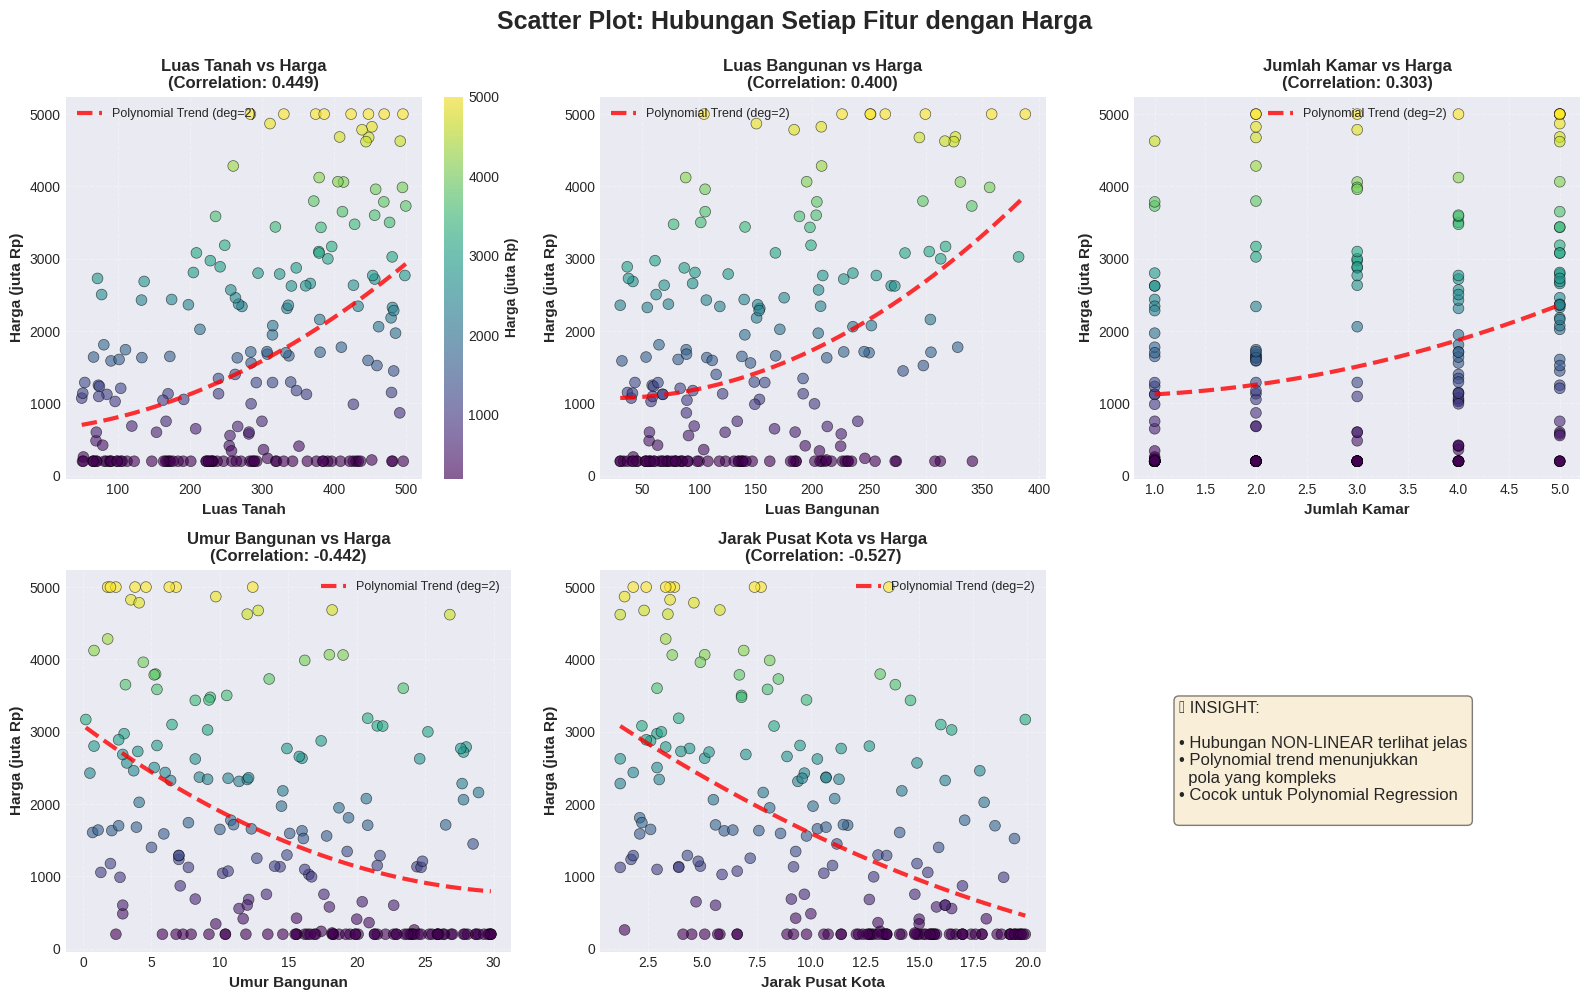

✓ Scatter plot setiap fitur vs harga berhasil ditampilkan


In [97]:
# EDA - Scatter Plot Setiap Fitur vs Harga
print("\n\n3. SCATTER PLOT SETIAP FITUR VS HARGA")
print("-" * 80)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Scatter Plot: Hubungan Setiap Fitur dengan Harga',
             fontsize=18, fontweight='bold', y=0.995)

features_x = [col for col in df.columns if col != 'harga']

for idx, feature in enumerate(features_x):
    ax = axes[idx // 3, idx % 3]

    # Scatter plot dengan color gradient
    scatter = ax.scatter(df[feature], df['harga'], c=df['harga'],
                        cmap='viridis', alpha=0.6, edgecolors='black',
                        linewidth=0.5, s=60)

    # Polynomial trend line (degree 2)
    z = np.polyfit(df[feature], df['harga'], 2)
    p = np.poly1d(z)
    x_line = np.linspace(df[feature].min(), df[feature].max(), 100)
    ax.plot(x_line, p(x_line), "r--", linewidth=3,
            label='Polynomial Trend (deg=2)', alpha=0.8)

    # Correlation coefficient
    corr = df[feature].corr(df['harga'])

    # Labels dan title
    ax.set_xlabel(feature.replace('_', ' ').title(), fontweight='bold', fontsize=11)
    ax.set_ylabel('Harga (juta Rp)', fontweight='bold', fontsize=11)
    ax.set_title(f'{feature.replace("_", " ").title()} vs Harga\n(Correlation: {corr:.3f})',
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=9, loc='best')
    ax.grid(True, alpha=0.3, linestyle='--')

    # Colorbar untuk subplot pertama
    if idx == 0:
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('Harga (juta Rp)', fontweight='bold', fontsize=10)

# Info di subplot kosong
ax = axes[1, 2]
ax.axis('off')
info_text = "📊 INSIGHT:\n\n"
info_text += "• Hubungan NON-LINEAR terlihat jelas\n"
info_text += "• Polynomial trend menunjukkan\n"
info_text += "  pola yang kompleks\n"
info_text += "• Cocok untuk Polynomial Regression\n"
ax.text(0.1, 0.5, info_text, fontsize=12, verticalalignment='center',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()
print("✓ Scatter plot setiap fitur vs harga berhasil ditampilkan")



4. CORRELATION MATRIX (HEATMAP)
--------------------------------------------------------------------------------


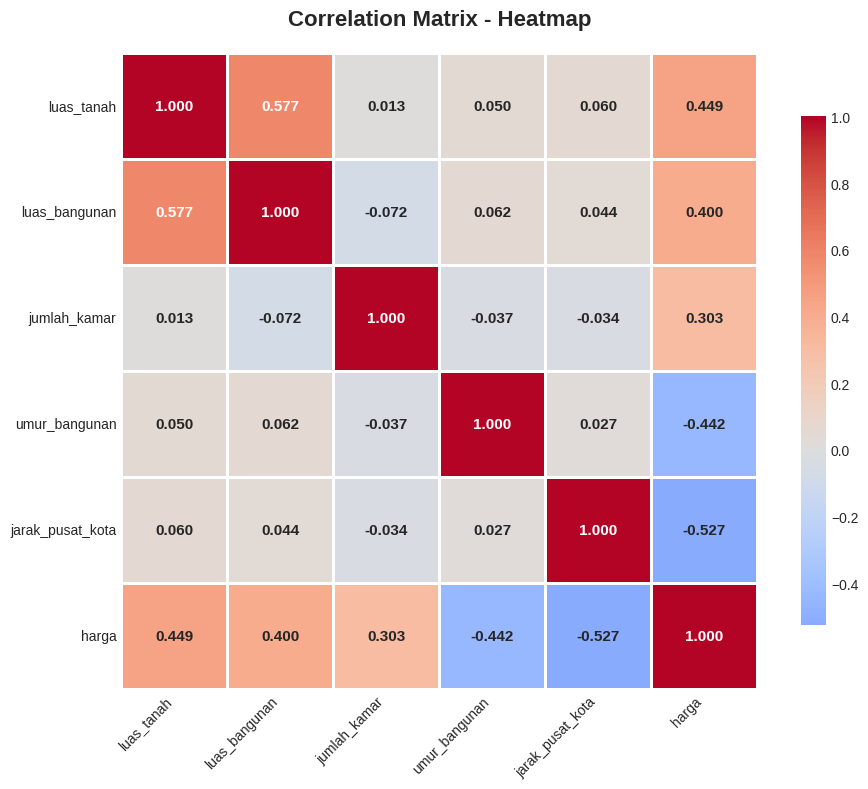


Correlation matrix heatmap berhasil ditampilkan

📊 Korelasi dengan Harga (Sorted):
--------------------------------------------------------------------------------
luas_tanah          :   0.449  (Positive, Moderate)
luas_bangunan       :   0.400  (Positive, Weak)
jumlah_kamar        :   0.303  (Positive, Weak)
umur_bangunan       :  -0.442  (Negative, Moderate)
jarak_pusat_kota    :  -0.527  (Negative, Moderate)


In [100]:
# EDA - Correlation Matrix (Heatmap)
print("\n\n4. CORRELATION MATRIX (HEATMAP)")
print("-" * 80)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            annot_kws={'fontsize': 11, 'fontweight': 'bold'}, ax=ax)

ax.set_title('Correlation Matrix - Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

print("\nCorrelation matrix heatmap berhasil ditampilkan")
print("\n📊 Korelasi dengan Harga (Sorted):")
print("-" * 80)
corr_with_price = correlation_matrix['harga'].sort_values(ascending=False)
for feature, corr_val in corr_with_price.items():
    if feature != 'harga':
        strength = 'Strong' if abs(corr_val) > 0.7 else 'Moderate' if abs(corr_val) > 0.4 else 'Weak'
        direction = 'Positive' if corr_val > 0 else 'Negative'
        print(f"{feature:<20}: {corr_val:>7.3f}  ({direction}, {strength})")



5. IDENTIFIKASI OUTLIERS
--------------------------------------------------------------------------------


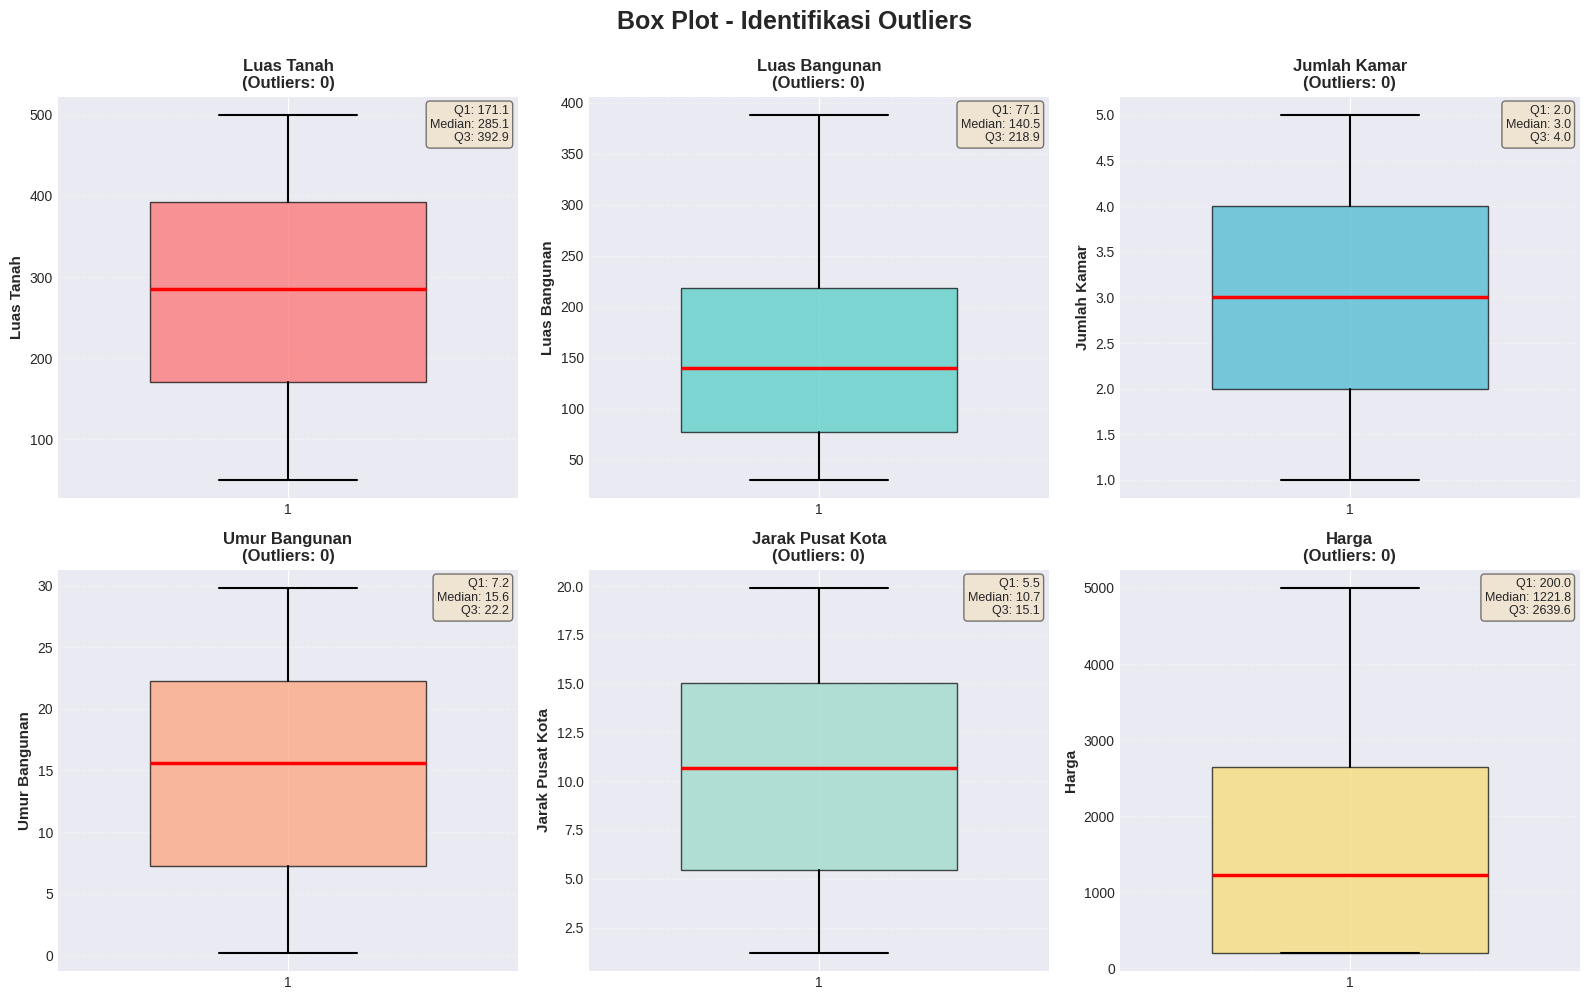


✓ Box plot untuk identifikasi outliers berhasil ditampilkan

📊 Summary Outliers (Metode IQR):
--------------------------------------------------------------------------------
Feature                   Jumlah Outliers      Persentase     
--------------------------------------------------------------------------------
luas_tanah                0                    0.00%
luas_bangunan             0                    0.00%
jumlah_kamar              0                    0.00%
umur_bangunan             0                    0.00%
jarak_pusat_kota          0                    0.00%
harga                     0                    0.00%
--------------------------------------------------------------------------------
TOTAL                     0                    0.00%


In [103]:
# EDA - Identifikasi Outliers
print("\n\n5. IDENTIFIKASI OUTLIERS")
print("-" * 80)

# Box Plot untuk deteksi outliers
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Box Plot - Identifikasi Outliers', fontsize=18, fontweight='bold', y=0.995)

outliers_summary = {}

for idx, (col, color) in enumerate(zip(features, colors)):
    ax = axes[idx // 3, idx % 3]

    # Calculate IQR untuk deteksi outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers_summary[col] = len(outliers)

    # Box plot
    bp = ax.boxplot(df[col], patch_artist=True, widths=0.6,
                    boxprops=dict(facecolor=color, alpha=0.7),
                    whiskerprops=dict(color='black', linewidth=1.5),
                    capprops=dict(color='black', linewidth=1.5),
                    medianprops=dict(color='red', linewidth=2.5),
                    flierprops=dict(marker='o', markerfacecolor='red',
                                   markersize=8, linestyle='none',
                                   markeredgecolor='black'))

    # Labels dan title
    ax.set_ylabel(col.replace('_', ' ').title(), fontweight='bold', fontsize=11)
    ax.set_title(f'{col.replace("_", " ").title()}\n(Outliers: {len(outliers)})',
                 fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y', linestyle='--')

    # Tambahkan info statistik
    stats_text = f'Q1: {Q1:.1f}\nMedian: {df[col].median():.1f}\nQ3: {Q3:.1f}'
    ax.text(0.98, 0.98, stats_text, transform=ax.transAxes,
            fontsize=9, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n✓ Box plot untuk identifikasi outliers berhasil ditampilkan")
print("\n📊 Summary Outliers (Metode IQR):")
print("-" * 80)
print(f"{'Feature':<25} {'Jumlah Outliers':<20} {'Persentase':<15}")
print("-" * 80)
for feature, count in outliers_summary.items():
    percentage = (count / len(df)) * 100
    print(f"{feature:<25} {count:<20} {percentage:<.2f}%")

total_outliers = sum(outliers_summary.values())
print("-" * 80)
print(f"{'TOTAL':<25} {total_outliers:<20} {(total_outliers/(len(df)*6))*100:<.2f}%")

In [106]:
# DATA PREPROCESSING - Handle Missing Values
print("\n\n" + "="*80)
print(" "*25 + "DATA PREPROCESSING")
print("="*80)
print("\n1. HANDLE MISSING VALUES")
print("-" * 80)

# Cek missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

if missing_values.sum() == 0:
    print("\nTidak ada missing values dalam dataset!")
else:
    print(f"\n⚠️  Total missing values: {missing_values.sum()}")
    # Handle missing values (jika ada)
    # Untuk numerik: bisa gunakan mean/median
    # df.fillna(df.mean(), inplace=True)
    print("Missing values telah ditangani")



                         DATA PREPROCESSING

1. HANDLE MISSING VALUES
--------------------------------------------------------------------------------
Missing Values per Column:
luas_tanah          0
luas_bangunan       0
jumlah_kamar        0
umur_bangunan       0
jarak_pusat_kota    0
harga               0
dtype: int64

Tidak ada missing values dalam dataset!


In [110]:
# DATA PREPROCESSING - Split Data Train-Test (70:30)
print("\n\n2. SPLIT DATA TRAIN-TEST (70:30)")
print("-" * 80)

# Pisahkan features (X) dan target (y)
X = df.drop('harga', axis=1)
y = df['harga']

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Data berhasil di-split!")
print(f"\n{'Dataset':<20} {'Jumlah':<15} {'Persentase':<15}")
print("-" * 80)
print(f"{'Total':<20} {len(df):<15} {100.0:<15.1f}%")
print(f"{'Training':<20} {len(X_train):<15} {(len(X_train)/len(df)*100):<15.1f}%")
print(f"{'Testing':<20} {len(X_test):<15} {(len(X_test)/len(df)*100):<15.1f}%")

print(f"\nShape Information:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test:  {X_test.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test:  {y_test.shape}")



2. SPLIT DATA TRAIN-TEST (70:30)
--------------------------------------------------------------------------------
Data berhasil di-split!

Dataset              Jumlah          Persentase     
--------------------------------------------------------------------------------
Total                200             100.0          %
Training             140             70.0           %
Testing              60              30.0           %

Shape Information:
  X_train: (140, 5)
  X_test:  (60, 5)
  y_train: (140,)
  y_test:  (60,)




3. FEATURE SCALING - STANDARDSCALER
--------------------------------------------------------------------------------
 StandardScaler berhasil diterapkan!

📊 StandardScaler Statistics (Training Data):
Feature                   Mean            Std            
--------------------------------------------------------------------------------
luas_tanah                -0.000000       1.003591       
luas_bangunan             0.000000        1.003591       
jumlah_kamar              0.000000        1.003591       
umur_bangunan             0.000000        1.003591       
jarak_pusat_kota          -0.000000       1.003591       


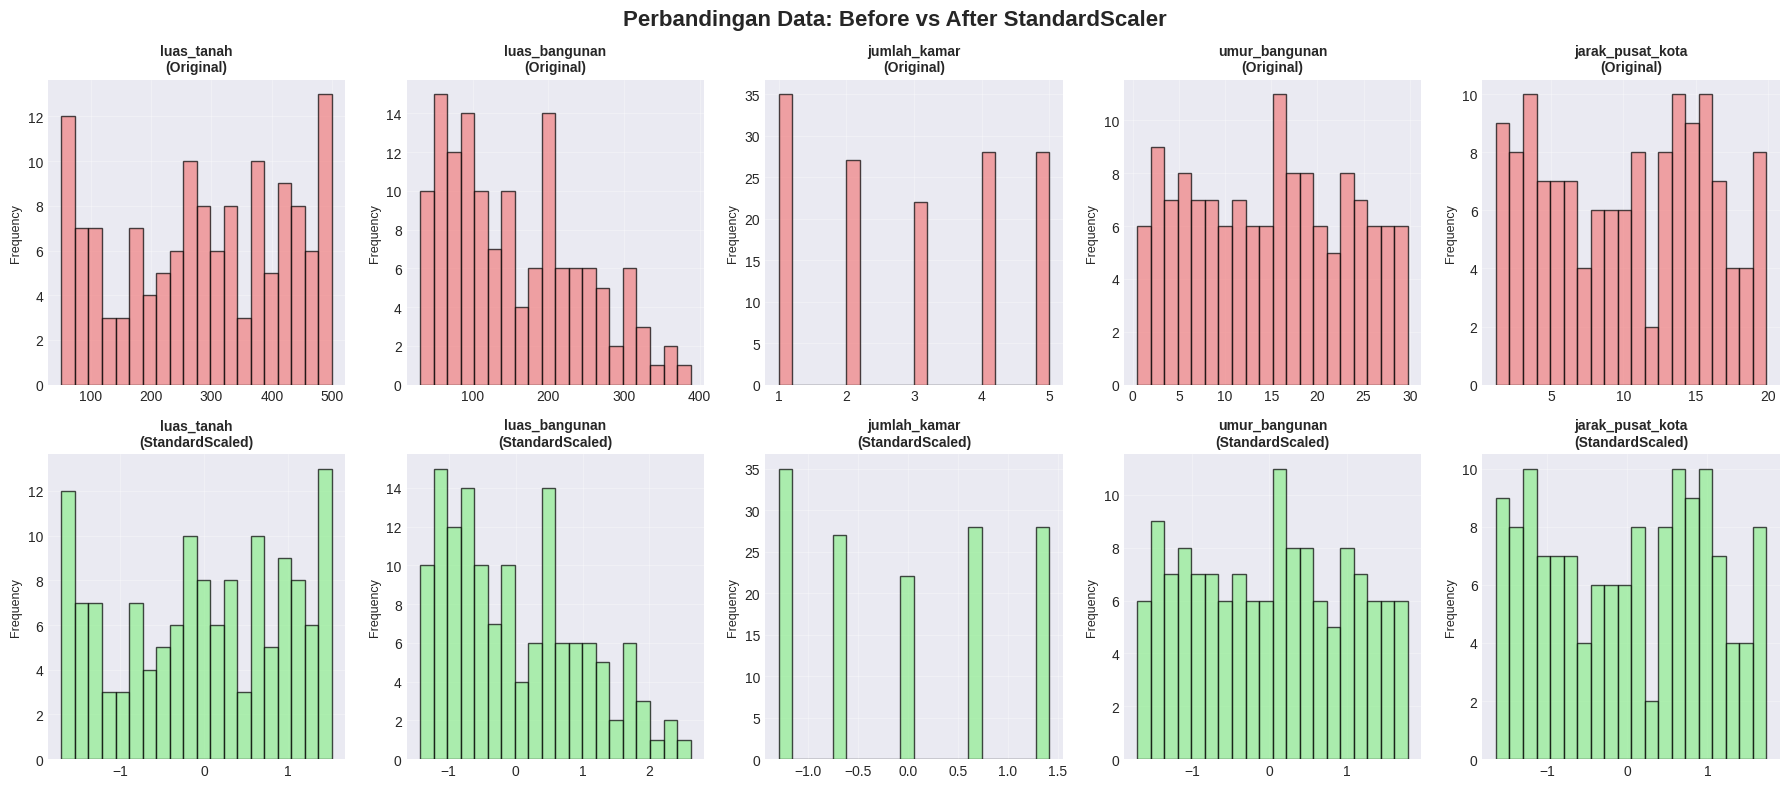


Visualisasi perbandingan berhasil ditampilkan


In [115]:
# DATA PREPROCESSING - Feature Scaling (StandardScaler)
print("\n\n3. FEATURE SCALING - STANDARDSCALER")
print("-" * 80)

# Initialize StandardScaler
scaler_standard = StandardScaler()

# Fit dan transform pada training data
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

# Convert ke DataFrame untuk visualisasi
X_train_scaled_standard_df = pd.DataFrame(X_train_scaled_standard,
                                          columns=X_train.columns)
X_test_scaled_standard_df = pd.DataFrame(X_test_scaled_standard,
                                         columns=X_test.columns)

print(" StandardScaler berhasil diterapkan!")
print("\n📊 StandardScaler Statistics (Training Data):")
print(f"{'Feature':<25} {'Mean':<15} {'Std':<15}")
print("-" * 80)
for col in X_train_scaled_standard_df.columns:
    mean_val = X_train_scaled_standard_df[col].mean()
    std_val = X_train_scaled_standard_df[col].std()
    print(f"{col:<25} {mean_val:<15.6f} {std_val:<15.6f}")

# Visualisasi perbandingan before-after scaling
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
fig.suptitle('Perbandingan Data: Before vs After StandardScaler',
             fontsize=16, fontweight='bold')

for idx, col in enumerate(X_train.columns):
    # Before scaling
    ax1 = axes[0, idx]
    ax1.hist(X_train[col], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
    ax1.set_title(f'{col}\n(Original)', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Frequency', fontsize=9)
    ax1.grid(True, alpha=0.3)

    # After scaling
    ax2 = axes[1, idx]
    ax2.hist(X_train_scaled_standard_df[col], bins=20, color='lightgreen',
             edgecolor='black', alpha=0.7)
    ax2.set_title(f'{col}\n(StandardScaled)', fontsize=10, fontweight='bold')
    ax2.set_ylabel('Frequency', fontsize=9)
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("\nVisualisasi perbandingan berhasil ditampilkan")



4. FEATURE SCALING - MINMAXSCALER
--------------------------------------------------------------------------------
 MinMaxScaler berhasil diterapkan!

 MinMaxScaler Statistics (Training Data):
Feature                   Min             Max            
--------------------------------------------------------------------------------
luas_tanah                0.000000        1.000000       
luas_bangunan             0.000000        1.000000       
jumlah_kamar              0.000000        1.000000       
umur_bangunan             0.000000        1.000000       
jarak_pusat_kota          0.000000        1.000000       


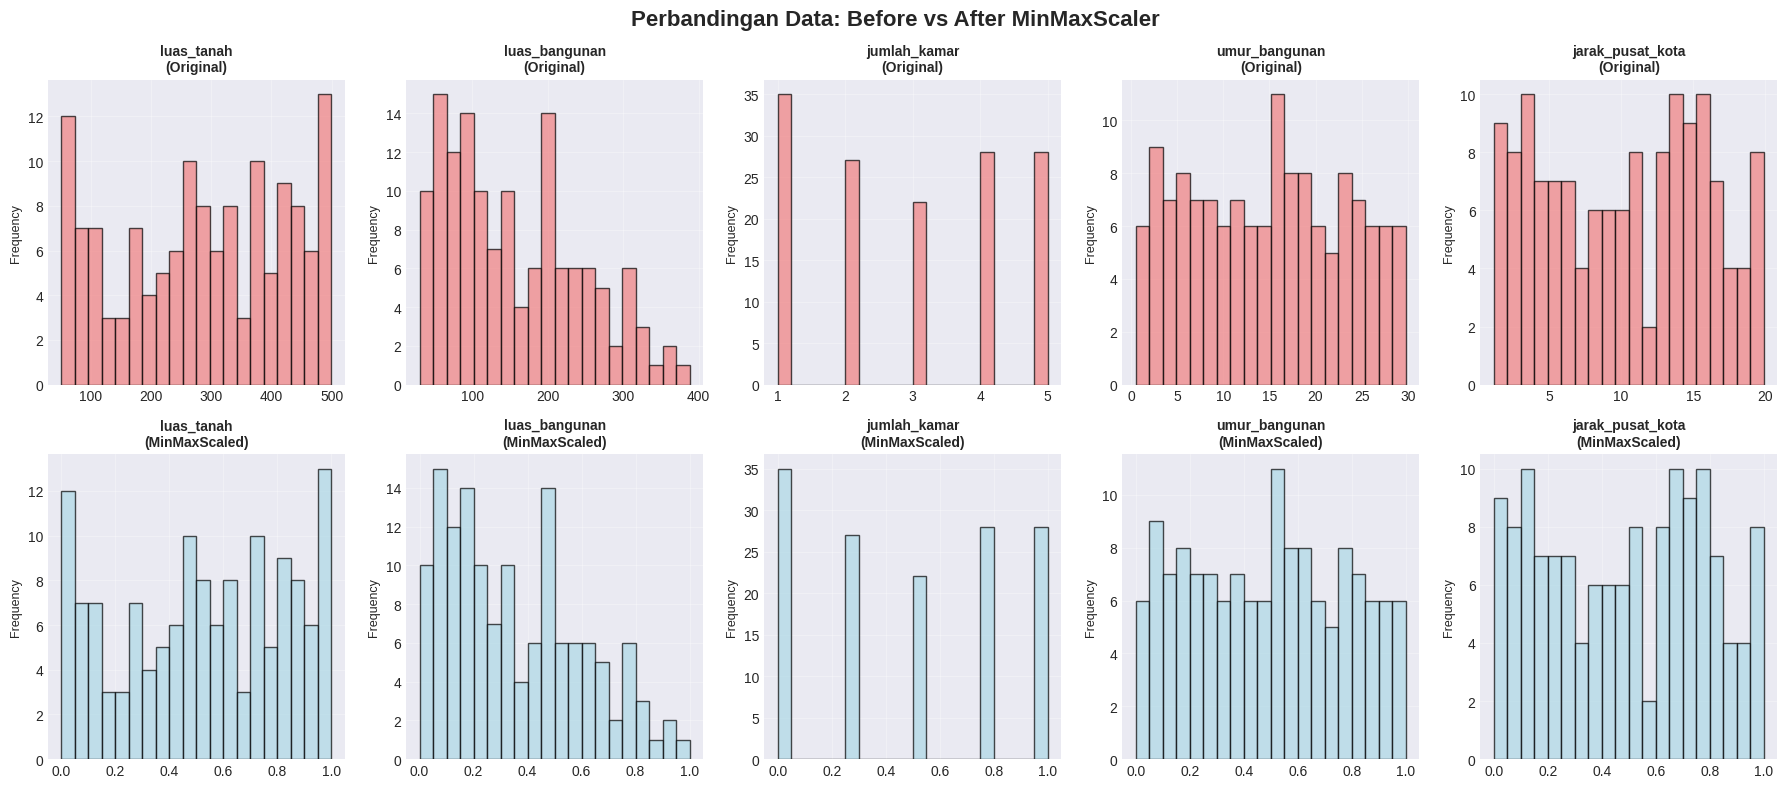


 Visualisasi perbandingan berhasil ditampilkan


In [116]:
# DATA PREPROCESSING - Feature Scaling (MinMaxScaler)
print("\n\n4. FEATURE SCALING - MINMAXSCALER")
print("-" * 80)

# Initialize MinMaxScaler
scaler_minmax = MinMaxScaler()

# Fit dan transform pada training data
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

# Convert ke DataFrame
X_train_scaled_minmax_df = pd.DataFrame(X_train_scaled_minmax,
                                        columns=X_train.columns)
X_test_scaled_minmax_df = pd.DataFrame(X_test_scaled_minmax,
                                       columns=X_test.columns)

print(" MinMaxScaler berhasil diterapkan!")
print("\n MinMaxScaler Statistics (Training Data):")
print(f"{'Feature':<25} {'Min':<15} {'Max':<15}")
print("-" * 80)
for col in X_train_scaled_minmax_df.columns:
    min_val = X_train_scaled_minmax_df[col].min()
    max_val = X_train_scaled_minmax_df[col].max()
    print(f"{col:<25} {min_val:<15.6f} {max_val:<15.6f}")

# Visualisasi perbandingan before-after scaling
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
fig.suptitle('Perbandingan Data: Before vs After MinMaxScaler',
             fontsize=16, fontweight='bold')

for idx, col in enumerate(X_train.columns):
    # Before scaling
    ax1 = axes[0, idx]
    ax1.hist(X_train[col], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
    ax1.set_title(f'{col}\n(Original)', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Frequency', fontsize=9)
    ax1.grid(True, alpha=0.3)

    # After scaling
    ax2 = axes[1, idx]
    ax2.hist(X_train_scaled_minmax_df[col], bins=20, color='lightblue',
             edgecolor='black', alpha=0.7)
    ax2.set_title(f'{col}\n(MinMaxScaled)', fontsize=10, fontweight='bold')
    ax2.set_ylabel('Frequency', fontsize=9)
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("\n Visualisasi perbandingan berhasil ditampilkan")

In [122]:
# SIMPAN SCALER untuk Prediksi Nanti
print("\n\n5. SIMPAN SCALER UNTUK PREDIKSI")
print("-" * 80)

# Simpan StandardScaler
with open('standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler_standard, f)
print("StandardScaler disimpan ke: 'standard_scaler.pkl'")

# Simpan MinMaxScaler
with open('minmax_scaler.pkl', 'wb') as f:
    pickle.dump(scaler_minmax, f)
print("MinMaxScaler disimpan ke: 'minmax_scaler.pkl'")

# Contoh cara load scaler
print("\n📝 Cara menggunakan scaler yang tersimpan:")
print("   # Load scaler")
print("   with open('standard_scaler.pkl', 'rb') as f:")
print("       loaded_scaler = pickle.load(f)")
print("   ")
print("   # Transform data baru")
print("   X_new_scaled = loaded_scaler.transform(X_new)")



5. SIMPAN SCALER UNTUK PREDIKSI
--------------------------------------------------------------------------------
StandardScaler disimpan ke: 'standard_scaler.pkl'
MinMaxScaler disimpan ke: 'minmax_scaler.pkl'

📝 Cara menggunakan scaler yang tersimpan:
   # Load scaler
   with open('standard_scaler.pkl', 'rb') as f:
       loaded_scaler = pickle.load(f)
   
   # Transform data baru
   X_new_scaled = loaded_scaler.transform(X_new)



Membuat Pair Plot (menggunakan 100 sample untuk performa)...


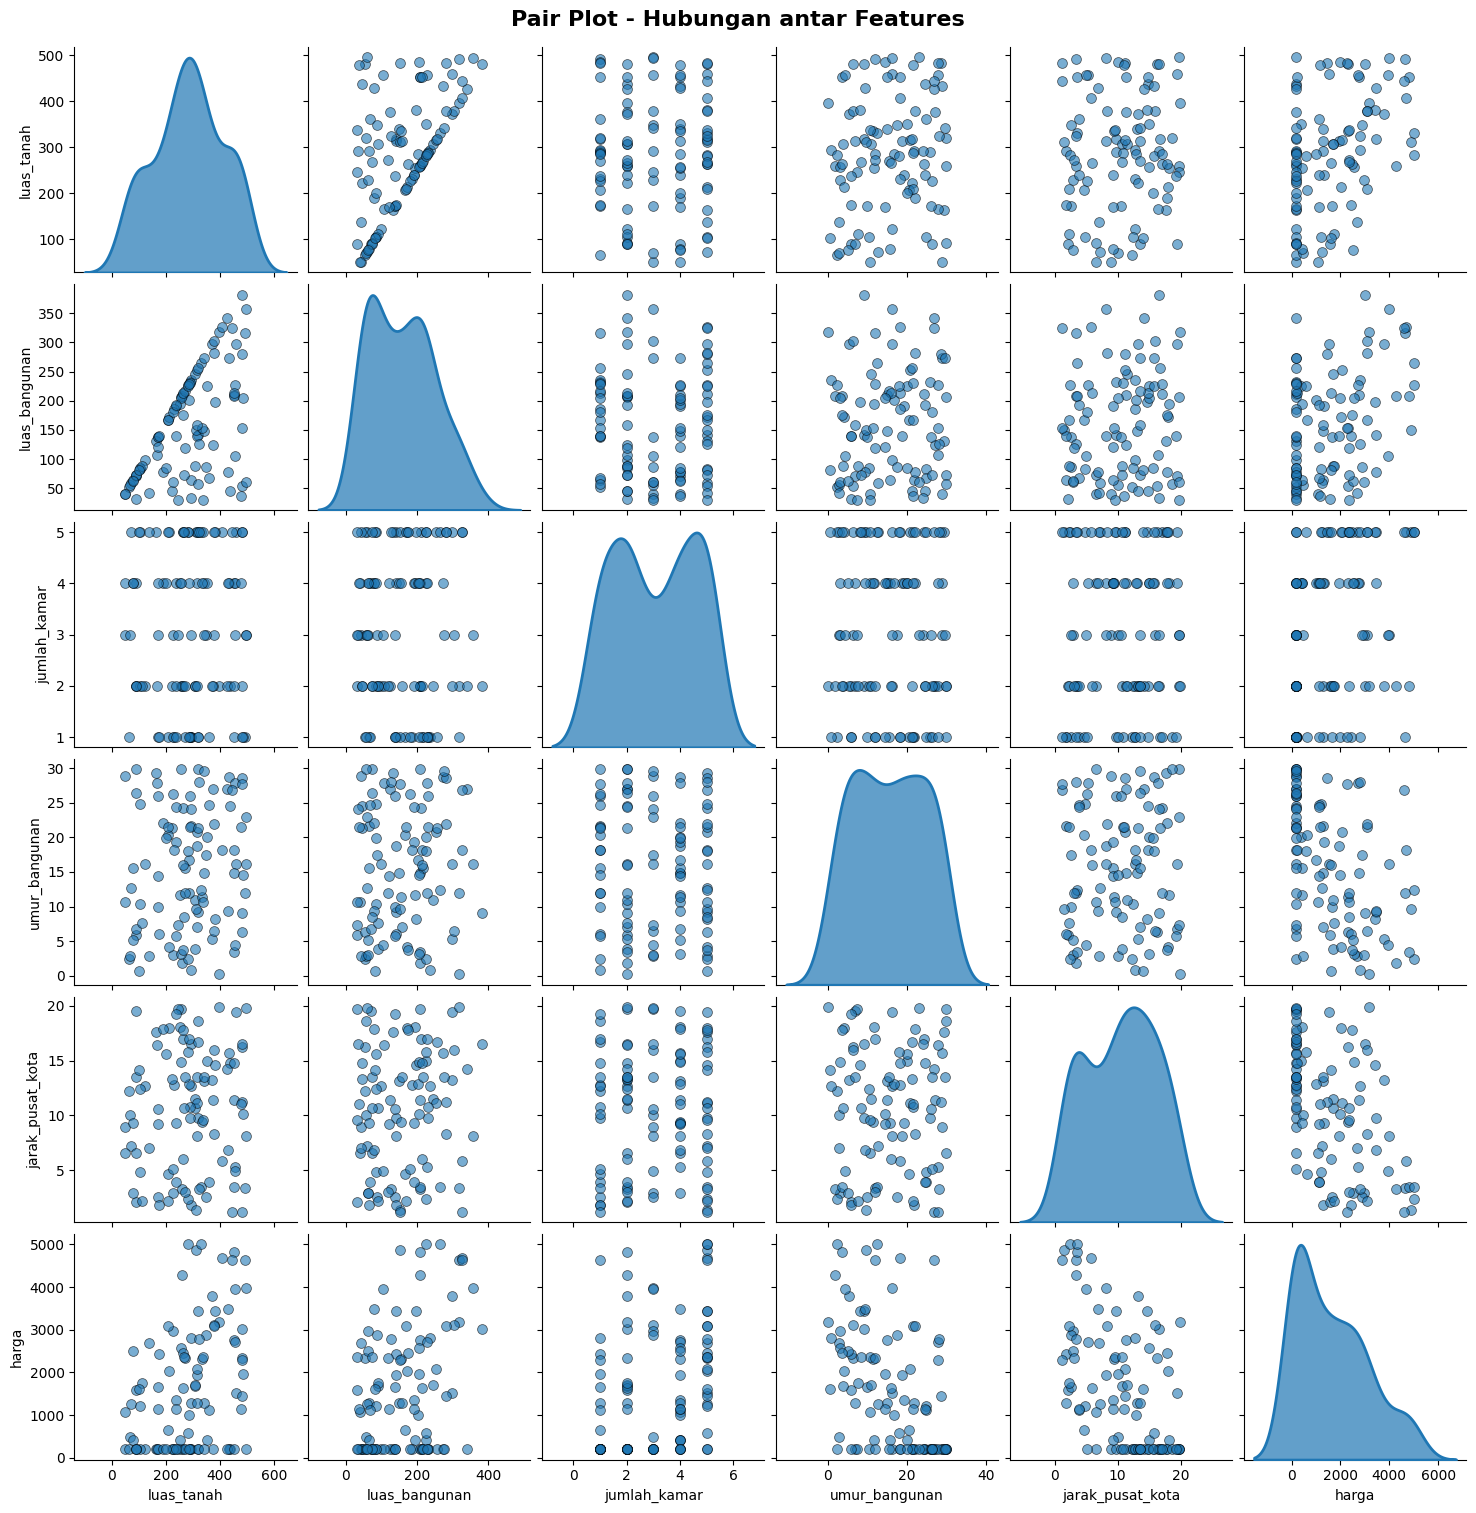

Pair plot berhasil ditampilkan


In [86]:
# Pair Plot (Sample 100 data untuk performa)
print("\n" + "="*70)
print("Membuat Pair Plot (menggunakan 100 sample untuk performa)...")
print("="*70)

# Sample data untuk pair plot (agar tidak terlalu lambat)
df_sample = df.sample(n=100, random_state=42)

# Pair plot
pairplot = sns.pairplot(df_sample, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'black'},
                        diag_kws={'alpha': 0.7, 'linewidth': 2})
pairplot.fig.suptitle('Pair Plot - Hubungan antar Features', y=1.01, fontsize=16, fontweight='bold')
plt.show()

print("Pair plot berhasil ditampilkan")

In [117]:
# Summary Report
print("\n" + "="*70)
print("SUMMARY REPORT")
print("="*70)
print("\n📊 Dataset Information:")
print(f"  • Total samples: {len(df)}")
print(f"  • Number of features: {len(df.columns) - 1}")
print(f"  • Target variable: harga (juta Rp)")
print(f"  • Training samples: {len(X_train)} (70%)")
print(f"  • Testing samples: {len(X_test)} (30%)")

print("\n📈 Feature Ranges:")
print(f"  • Luas Tanah: {df['luas_tanah'].min():.1f} - {df['luas_tanah'].max():.1f} m²")
print(f"  • Luas Bangunan: {df['luas_bangunan'].min():.1f} - {df['luas_bangunan'].max():.1f} m²")
print(f"  • Jumlah Kamar: {df['jumlah_kamar'].min()} - {df['jumlah_kamar'].max()}")
print(f"  • Umur Bangunan: {df['umur_bangunan'].min():.1f} - {df['umur_bangunan'].max():.1f} tahun")
print(f"  • Jarak Pusat Kota: {df['jarak_pusat_kota'].min():.1f} - {df['jarak_pusat_kota'].max():.1f} km")

print("\n💰 Target (Harga) Statistics:")
print(f"  • Min: {df['harga'].min():.1f} juta Rp")
print(f"  • Max: {df['harga'].max():.1f} juta Rp")
print(f"  • Mean: {df['harga'].mean():.1f} juta Rp")
print(f"  • Median: {df['harga'].median():.1f} juta Rp")
print(f"  • Std: {df['harga'].std():.1f} juta Rp")

print("\n🔗 Top 3 Correlations with Price:")
corr_sorted = df.corr()['harga'].sort_values(ascending=False)[1:4]
for i, (feature, corr_val) in enumerate(corr_sorted.items(), 1):
    print(f"  {i}. {feature}: {corr_val:.3f}")


SUMMARY REPORT

📊 Dataset Information:
  • Total samples: 200
  • Number of features: 5
  • Target variable: harga (juta Rp)
  • Training samples: 140 (70%)
  • Testing samples: 60 (30%)

📈 Feature Ranges:
  • Luas Tanah: 50.1 - 499.7 m²
  • Luas Bangunan: 30.4 - 388.0 m²
  • Jumlah Kamar: 1 - 5
  • Umur Bangunan: 0.2 - 29.8 tahun
  • Jarak Pusat Kota: 1.2 - 19.9 km

💰 Target (Harga) Statistics:
  • Min: 200.0 juta Rp
  • Max: 5000.0 juta Rp
  • Mean: 1618.8 juta Rp
  • Median: 1221.8 juta Rp
  • Std: 1486.3 juta Rp

🔗 Top 3 Correlations with Price:
  1. luas_tanah: 0.449
  2. luas_bangunan: 0.400
  3. jumlah_kamar: 0.303


In [118]:
# 2. MODEL IMPLEMENTATION
# =================================================================
# 2.A. Polynomial Feature Engineering
# =================================================================
print("="*70)
print("2. MODEL IMPLEMENTATION")
print("="*70)
print("\n2.A. Polynomial Feature Engineering")
print("-"*70)

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Prepare data for polynomial features
X = df.drop('harga', axis=1)
y = df['harga']

# List of degrees to try
degrees = [1, 2, 3, 4, 5]

# Dictionary to store polynomial features and feature names
poly_features = {}
feature_names = {}

print("Jumlah fitur untuk setiap degree:")
print("-"*50)
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Store the polynomial features and feature names
    poly_features[degree] = X_poly
    feature_names[degree] = poly.get_feature_names_out(X.columns)

    # Print number of features for each degree
    print(f"Degree {degree}: {X_poly.shape[1]} features")

2. MODEL IMPLEMENTATION

2.A. Polynomial Feature Engineering
----------------------------------------------------------------------
Jumlah fitur untuk setiap degree:
--------------------------------------------------
Degree 1: 5 features
Degree 2: 20 features
Degree 3: 55 features
Degree 4: 125 features
Degree 5: 251 features


In [119]:
# =================================================================
# 2.B. Model Training with Different Regularization Techniques
# =================================================================
print("\n" + "="*70)
print("2.B. Model Training with Different Regularization Techniques")
print("-"*70)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Prepare data for training
X = df.drop('harga', axis=1)
y = df['harga']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store models and their performance
models = {}
results = []

def evaluate_model(model, X_tr, X_te, y_tr, y_te, model_name, degree, alpha=None):
    """Helper function to evaluate models"""
    # Train the model
    model.fit(X_tr, y_tr)

    # Make predictions
    y_pred_tr = model.predict(X_tr)
    y_pred_te = model.predict(X_te)

    # Calculate metrics
    train_mse = mean_squared_error(y_tr, y_pred_tr)
    test_mse = mean_squared_error(y_te, y_pred_te)
    train_r2 = r2_score(y_tr, y_pred_tr)
    test_r2 = r2_score(y_te, y_pred_te)

    # Store results
    result = {
        'Model': model_name,
        'Degree': degree,
        'Alpha': alpha,
        'Train_MSE': train_mse,
        'Test_MSE': test_mse,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Model_Object': model
    }

    # Print results
    print(f"\n{model_name} (Degree {degree})" + (f", Alpha={alpha}" if alpha else ""))
    print("-" * 50)
    print(f"Training MSE: {train_mse:.2f}")
    print(f"Testing MSE:  {test_mse:.2f}")
    print(f"Training R²:  {train_r2:.4f}")
    print(f"Testing R²:   {test_r2:.4f}")

    return result

# Train models for each degree
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # 1. Linear Regression (no regularization)
    lr = LinearRegression()
    lr_result = evaluate_model(lr, X_train_poly, X_test_poly, y_train, y_test,
                             "Linear Regression", degree)
    results.append(lr_result)

    # 2. Ridge Regression
    for alpha in [0.1, 1, 10]:
        ridge = Ridge(alpha=alpha, random_state=42)
        ridge_result = evaluate_model(ridge, X_train_poly, X_test_poly, y_train, y_test,
                                    "Ridge Regression", degree, alpha)
        results.append(ridge_result)

    # 3. Lasso Regression
    for alpha in [0.1, 1, 10]:
        lasso = Lasso(alpha=alpha, random_state=42, max_iter=10000)
        lasso_result = evaluate_model(lasso, X_train_poly, X_test_poly, y_train, y_test,
                                    "Lasso Regression", degree, alpha)
        results.append(lr_result)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print("\n" + "="*70)
print("MODEL PERFORMANCE SUMMARY")
print("="*70)
print(results_df[['Model', 'Degree', 'Alpha', 'Test_MSE', 'Test_R2']].sort_values('Test_R2', ascending=False))


2.B. Model Training with Different Regularization Techniques
----------------------------------------------------------------------

Linear Regression (Degree 1)
--------------------------------------------------
Training MSE: 386628.77
Testing MSE:  332997.40
Training R²:  0.8283
Testing R²:   0.8382

Ridge Regression (Degree 1), Alpha=0.1
--------------------------------------------------
Training MSE: 386628.79
Testing MSE:  332993.79
Training R²:  0.8283
Testing R²:   0.8382

Ridge Regression (Degree 1), Alpha=1
--------------------------------------------------
Training MSE: 386630.76
Testing MSE:  332963.10
Training R²:  0.8283
Testing R²:   0.8382

Ridge Regression (Degree 1), Alpha=10
--------------------------------------------------
Training MSE: 386816.51
Testing MSE:  332819.96
Training R²:  0.8282
Testing R²:   0.8383

Lasso Regression (Degree 1), Alpha=0.1
--------------------------------------------------
Training MSE: 386628.78
Testing MSE:  332995.68
Training R²:  0.8


2.C. Custom Polynomial Regression with Gradient Descent
----------------------------------------------------------------------
Training custom polynomial regression models...


Custom Polynomial Regression (Degree 1)
Training MSE: 134298.98
Testing MSE:  201392.10
Training R²:  0.9403
Testing R²:   0.9022


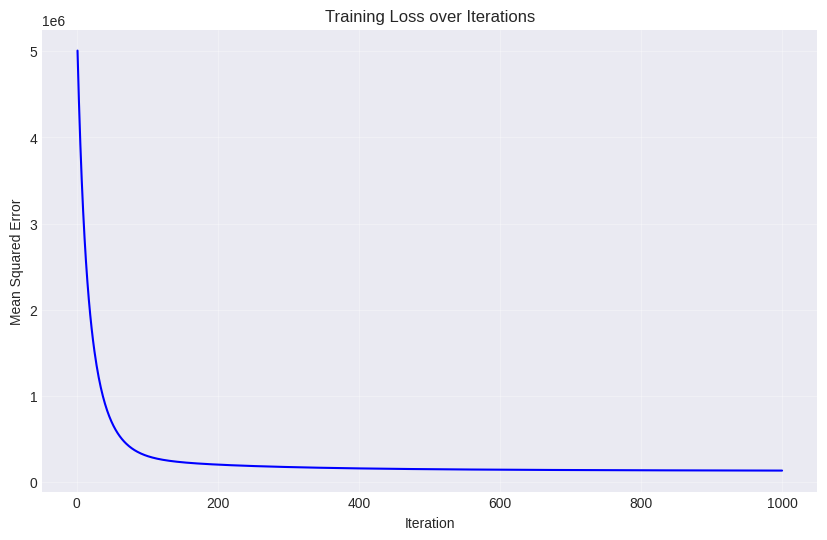


Custom Polynomial Regression (Degree 2)
Training MSE: 104169.84
Testing MSE:  174887.67
Training R²:  0.9537
Testing R²:   0.9150


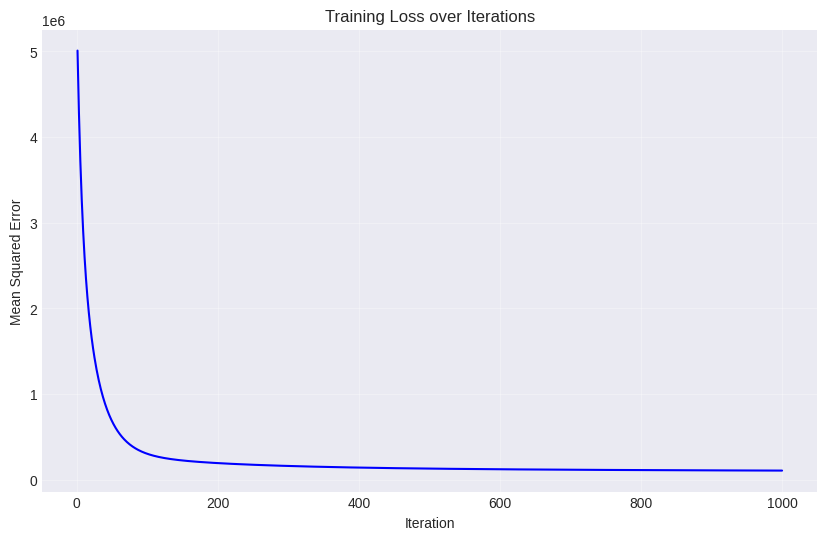


Custom Polynomial Regression (Degree 3)
Training MSE: 94581.73
Testing MSE:  165837.19
Training R²:  0.9580
Testing R²:   0.9194


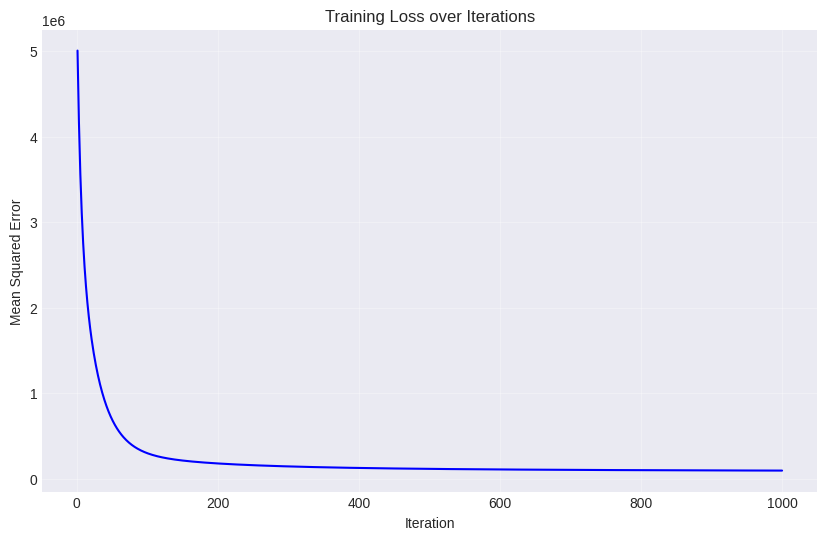


Custom model training and evaluation complete!


In [120]:
# =================================================================
# 2.C. Custom Polynomial Regression with Gradient Descent
# =================================================================
print("\n" + "="*70)
print("2.C. Custom Polynomial Regression with Gradient Descent")
print("-"*70)

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

class CustomPolynomialRegression:
    def __init__(self, degree=2, learning_rate=0.01, n_iter=1000, random_state=42):
        self.degree = degree
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.scaler = StandardScaler()

    def _add_polynomial_features(self, X):
        """Generate polynomial features"""
        X_poly = X.copy()

        # Add polynomial features
        for d in range(2, self.degree + 1):
            X_poly = np.column_stack((X_poly, X ** d))

        # Add interaction terms
        n_features = X.shape[1]
        for i in range(n_features):
            for j in range(i + 1, n_features):
                X_poly = np.column_stack((X_poly, X[:, i] * X[:, j]))

        return X_poly

    def fit(self, X, y):
        """Train the model using gradient descent"""
        np.random.seed(self.random_state)

        # Generate polynomial features
        X_poly = self._add_polynomial_features(X)

        # Scale features
        X_scaled = self.scaler.fit_transform(X_poly)

        # Add bias term
        X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

        # Initialize weights
        self.weights = np.random.randn(X_scaled.shape[1])

        # Gradient descent
        n = len(y)
        self.loss_history = []

        for _ in range(self.n_iter):
            # Predictions
            y_pred = np.dot(X_scaled, self.weights)

            # Calculate loss (MSE)
            loss = np.mean((y_pred - y) ** 2)
            self.loss_history.append(loss)

            # Calculate gradients
            dw = (2/n) * np.dot(X_scaled.T, (y_pred - y))

            # Update weights
            self.weights -= self.learning_rate * dw

        # Set bias and weights
        self.bias = self.weights[0]
        self.weights = self.weights[1:]

        return self

    def predict(self, X):
        """Make predictions"""
        # Generate polynomial features
        X_poly = self._add_polynomial_features(X)

        # Scale features
        X_scaled = self.scaler.transform(X_poly)

        # Add bias term and make prediction
        return np.dot(X_scaled, self.weights) + self.bias

    def plot_loss_history(self):
        """Plot the training loss over iterations"""
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.loss_history) + 1), self.loss_history, 'b-')
        plt.title('Training Loss over Iterations')
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.grid(True, alpha=0.3)
        plt.show()

# Prepare data for training
X = df.drop('harga', axis=1).values
y = df['harga'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate custom polynomial regression for each degree
print("Training custom polynomial regression models...\n")

for degree in [1, 2, 3]:  # Limiting to degree 3 for computational efficiency
    print(f"\n{'='*50}")
    print(f"Custom Polynomial Regression (Degree {degree})")
    print("="*50)

    # Create and train model
    model = CustomPolynomialRegression(degree=degree, learning_rate=0.01, n_iter=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    # Print results
    print(f"Training MSE: {train_mse:.2f}")
    print(f"Testing MSE:  {test_mse:.2f}")
    print(f"Training R²:  {train_r2:.4f}")
    print(f"Testing R²:   {test_r2:.4f}")

    # Plot loss history
    model.plot_loss_history()

print("\nCustom model training and evaluation complete!")

In [123]:
# =================================================================
# 3. MODEL EVALUATION - Setup and Imports
# =================================================================
print("="*70)
print("3. MODEL EVALUATION - Setup and Imports")
print("="*70)

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error
)
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')

print("✅ Evaluation setup complete!")

3. MODEL EVALUATION - Setup and Imports
✅ Evaluation setup complete!


In [124]:
# =================================================================
# 3.A.1 Metrics Calculation Function
# =================================================================
print("="*70)
print("3.A.1 Metrics Calculation Function")
print("="*70)

def calculate_metrics(y_true, y_pred, set_name):
    """
    Calculate and return a dictionary of regression metrics.

    Args:
        y_true: Array of true target values
        y_pred: Array of predicted values
        set_name: Name of the dataset (e.g., 'Train', 'Test')

    Returns:
        Dictionary containing all calculated metrics
    """
    metrics = {
        f'{set_name}_R2': r2_score(y_true, y_pred),
        f'{set_name}_MSE': mean_squared_error(y_true, y_pred),
        f'{set_name}_RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        f'{set_name}_MAE': mean_absolute_error(y_true, y_pred),
        f'{set_name}_MAPE': mean_absolute_percentage_error(y_true, y_pred) * 100  # as percentage
    }
    return metrics

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, degree, alpha=None):
    """
    Evaluate a model and return a dictionary with all metrics.
    """
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for both train and test sets
    train_metrics = calculate_metrics(y_train, y_train_pred, 'Train')
    test_metrics = calculate_metrics(y_test, y_test_pred, 'Test')

    # Combine all metrics
    metrics = {
        'Model': model_name,
        'Degree': degree,
        'Alpha': alpha
    }
    metrics.update(train_metrics)
    metrics.update(test_metrics)

    return metrics

print("✅ Metrics calculation functions defined!")

3.A.1 Metrics Calculation Function
✅ Metrics calculation functions defined!


In [127]:
# =================================================================
# 3.B.1 Learning Curves and Overfitting Analysis
# =================================================================
print("="*70)
print("3.B.1 Learning Curves and Overfitting Analysis")
print("="*70)

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve.

    Args:
        estimator: Model object that implements "fit" and "predict" methods
        title: Title for the chart
        X: Feature matrix
        y: Target vector
        cv: Cross-validation strategy
        n_jobs: Number of jobs to run in parallel
        train_sizes: Relative or absolute numbers of training examples to plot
    """
    plt.figure(figsize=(10, 6))
    plt.title(title, fontsize=16)
    plt.xlabel("Training Examples", fontsize=12)
    plt.ylabel("Score (R²)", fontsize=12)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='r2', random_state=42)

    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid(True, alpha=0.3)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.tight_layout()

    return plt

def analyze_overfitting_underfitting(results_df):
    """Analyze and print whether each model is underfitting, overfitting, or optimal."""
    print("\n" + "="*70)
    print("Overfitting/Underfitting Analysis")
    print("="*70)

    for idx, row in results_df.iterrows():
        train_r2 = row['Train_R2']
        test_r2 = row['Test_R2']
        gap = abs(train_r2 - test_r2)

        print(f"\nModel: {row['Model']} (Degree {row['Degree']}" +
              (f", Alpha={row['Alpha']}" if pd.notna(row['Alpha']) else "") + ")")
        print("-" * 50)

        # Underfitting: Both train and test scores are low
        if train_r2 < 0.5 and test_r2 < 0.5:
            print("🔍 Diagnosis: Underfitting (High Bias)")
            print("   - Both training and test scores are low")
            print(f"   - Training R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
        # Overfitting: Large gap between train and test scores
        elif gap > 0.2:
            print("🔍 Diagnosis: Overfitting (High Variance)")
            print("   - Large gap between training and test scores")
            print(f"   - Training R²: {train_r2:.4f}, Test R²: {test_r2:.4f}, Gap: {gap:.4f}")
        # Optimal: Good balance with high scores and small gap
        else:
            print("✅ Diagnosis: Good Fit (Balanced Bias-Variance)")
            print("   - Good balance between training and test scores")
            print(f"   - Training R²: {train_r2:.4f}, Test R²: {test_r2:.4f}, Gap: {gap:.4f}")

    print("\n📊 Bias-Variance Trade-off Analysis:")
    print("- High bias (underfitting) models are too simple to capture patterns in the data.")
    print("- High variance (overfitting) models capture noise in the training data.")
    print("- Optimal models balance bias and variance, generalizing well to unseen data.")

print("✅ Learning curve and analysis functions defined!")

3.B.1 Learning Curves and Overfitting Analysis
✅ Learning curve and analysis functions defined!


In [133]:
# =================================================================
# 3.C.1 Visualization Functions
# =================================================================
print("="*70)
print("3.C.1 Visualization Functions")
print("="*70)

def plot_pred_vs_actual(y_true, y_pred, model_name):
    """
    Plot predicted vs actual values with a reference line.
    """
    plt.figure(figsize=(10, 6))

    # Create scatter plot
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='w', linewidth=0.5)

    # Add reference line (perfect prediction)
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

    # Add labels and title
    plt.title(f'Predicted vs Actual Values\n{model_name}', fontsize=14, pad=20)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, alpha=0.3)

    # Add R² to the plot
    r2 = r2_score(y_true, y_pred)
    plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

    plt.tight_layout()
    plt.show()

def plot_residuals(y_true, y_pred, model_name):
    """
    Plot residuals vs predicted values.
    """
    residuals = y_true - y_pred

    plt.figure(figsize=(10, 6))

    # Create residual plot
    plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='w', linewidth=0.5)

    # Add reference line at y=0
    plt.axhline(y=0, color='r', linestyle='--', lw=2)

    # Add labels and title
    plt.title(f'Residuals Plot\n{model_name}', fontsize=14, pad=20)
    plt.xlabel('Predicted Values', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_polynomial_curve(model, X, y, feature_idx=0, n_points=100, degree=2):
    """
    Plot the polynomial curve for a single feature.
    """
    if isinstance(X, pd.DataFrame):
        # If X is a DataFrame, use .iloc for integer-location based indexing
        x_min, x_max = X.iloc[:, feature_idx].min(), X.iloc[:, feature_idx].max()
        x_range = np.linspace(x_min, x_max, n_points)

        # Create a DataFrame with all features set to their mean, except the selected one
        X_plot = pd.DataFrame(np.tile(X.mean(axis=0), (n_points, 1)), columns=X.columns)
        X_plot.iloc[:, feature_idx] = x_range
    else:
        # If X is a NumPy array
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        x_min, x_max = X[:, feature_idx].min(), X[:, feature_idx].max()
        x_range = np.linspace(x_min, x_max, n_points)

        # Create a matrix with all features set to their mean, except the selected one
        X_plot = np.tile(X.mean(axis=0), (n_points, 1))
        X_plot[:, feature_idx] = x_range


    # Make predictions
    y_pred = model.predict(X_plot)

    # Plot the results
    plt.figure(figsize=(10, 6))

    # Plot training data points
    if isinstance(X, pd.DataFrame):
        plt.scatter(X.iloc[:, feature_idx], y, alpha=0.5, label='Data Points')
        feature_name = X.columns[feature_idx]
    else:
         plt.scatter(X[:, feature_idx], y, alpha=0.5, label='Data Points')
         feature_name = f'Feature {feature_idx}'


    # Plot the polynomial curve
    plt.plot(x_range, y_pred, 'r-', linewidth=2, label=f'Degree {degree} Polynomial')

    # Add labels and title
    plt.title(f'Polynomial Fit for {feature_name}\n(Degree {degree})', fontsize=14, pad=20)
    plt.xlabel(feature_name, fontsize=12)
    plt.ylabel('Target', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_r2_by_degree(results_df):
    """
    Plot R² scores by polynomial degree for different models.
    """
    # Group by degree and model type
    models = results_df['Model'].unique()
    degrees = sorted(results_df['Degree'].unique())

    # Create a figure with two subplots (train and test)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot for each model type
    for model in models:
        model_data = results_df[results_df['Model'] == model]

        # Get R² scores for train and test
        train_r2 = []
        test_r2 = []

        for degree in degrees:
            # Get the best alpha for this model and degree
            subset = model_data[model_data['Degree'] == degree]
            if not subset.empty:
                best_idx = subset['Test_R2'].idxmax()
                train_r2.append(subset.loc[best_idx, 'Train_R2'])
                test_r2.append(subset.loc[best_idx, 'Test_R2'])

        # Plot train R²
        ax1.plot(degrees[:len(train_r2)], train_r2, 'o-', label=f'{model} (Train)')

        # Plot test R²
        ax2.plot(degrees[:len(test_r2)], test_r2, 'o--', label=f'{model} (Test)')

    # Customize plots
    for ax, title in zip([ax1, ax2], ['Training R² by Polynomial Degree', 'Test R² by Polynomial Degree']):
        ax.set_xlabel('Polynomial Degree', fontsize=12)
        ax.set_ylabel('R² Score', fontsize=12)
        ax.set_title(title, fontsize=14, pad=20)
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best')

    plt.tight_layout()
    plt.show()

print("✅ Visualization functions defined!")

3.C.1 Visualization Functions
✅ Visualization functions defined!


3. RUNNING COMPLETE MODEL EVALUATION

🚀 Training and evaluating models...

EVALUATING DEGREE 1

Training Linear Regression (Degree 1)...
  Test R²: 0.8382, Test RMSE: 577.06

Training Ridge (α=0.1) (Degree 1)...
  Test R²: 0.8382, Test RMSE: 577.06

Training Ridge (α=1) (Degree 1)...
  Test R²: 0.8382, Test RMSE: 577.03

Training Ridge (α=10) (Degree 1)...
  Test R²: 0.8383, Test RMSE: 576.91

Training Lasso (α=0.1) (Degree 1)...
  Test R²: 0.8382, Test RMSE: 577.06

Training Lasso (α=1) (Degree 1)...
  Test R²: 0.8382, Test RMSE: 577.04

Training Lasso (α=10) (Degree 1)...
  Test R²: 0.8383, Test RMSE: 576.95

EVALUATING DEGREE 2

Training Linear Regression (Degree 2)...
  Test R²: 0.9265, Test RMSE: 388.86

Training Ridge (α=0.1) (Degree 2)...
  Test R²: 0.9265, Test RMSE: 388.93

Training Ridge (α=1) (Degree 2)...
  Test R²: 0.9263, Test RMSE: 389.46

Training Ridge (α=10) (Degree 2)...
  Test R²: 0.9253, Test RMSE: 392.15

Training Lasso (α=0.1) (Degree 2)...
  Test R²: 0.9265, Tes

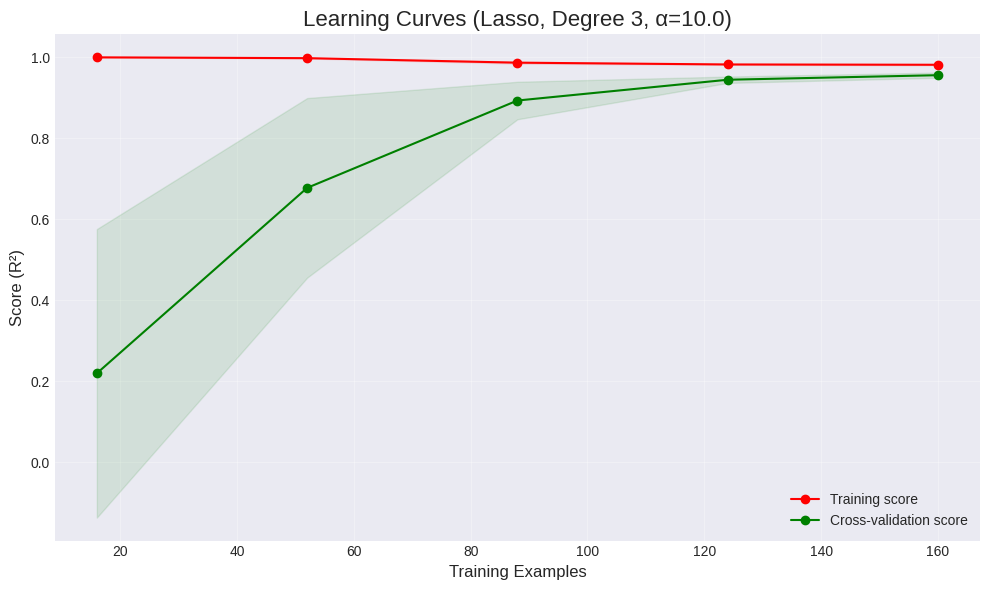

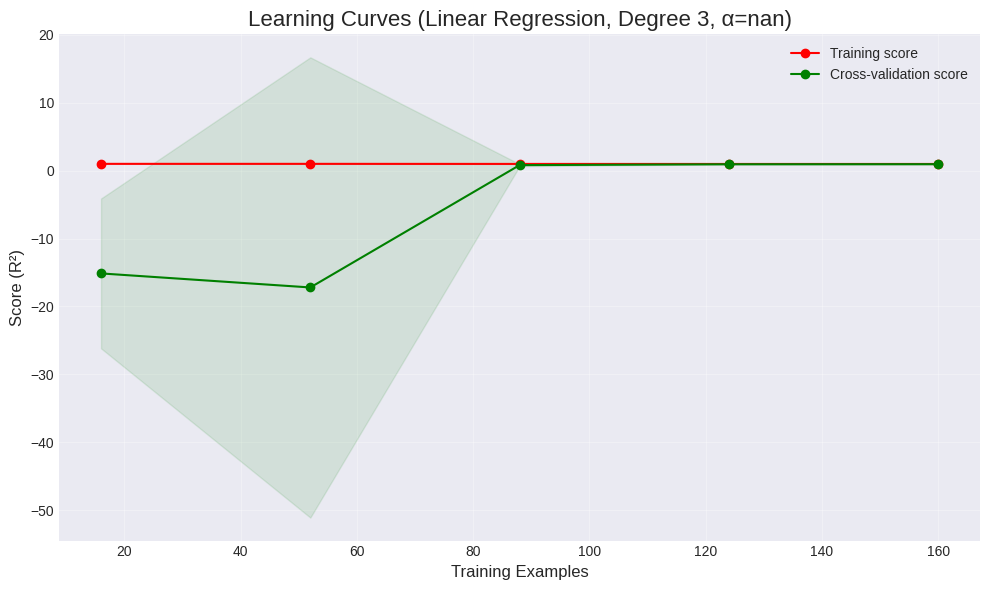

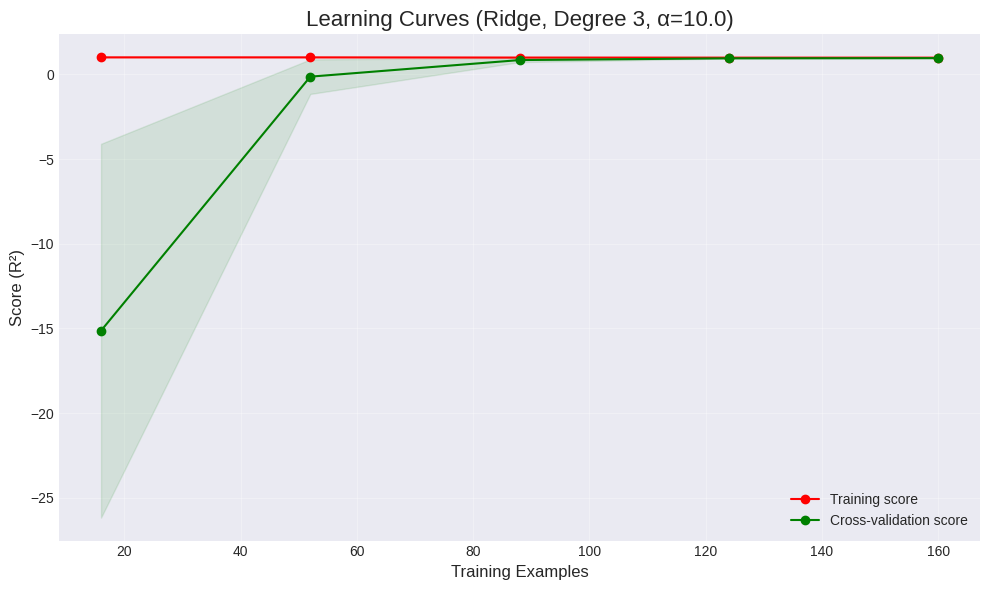


3.C.2 VISUALIZATION OF RESULTS

📊 R² Score Comparison by Polynomial Degree


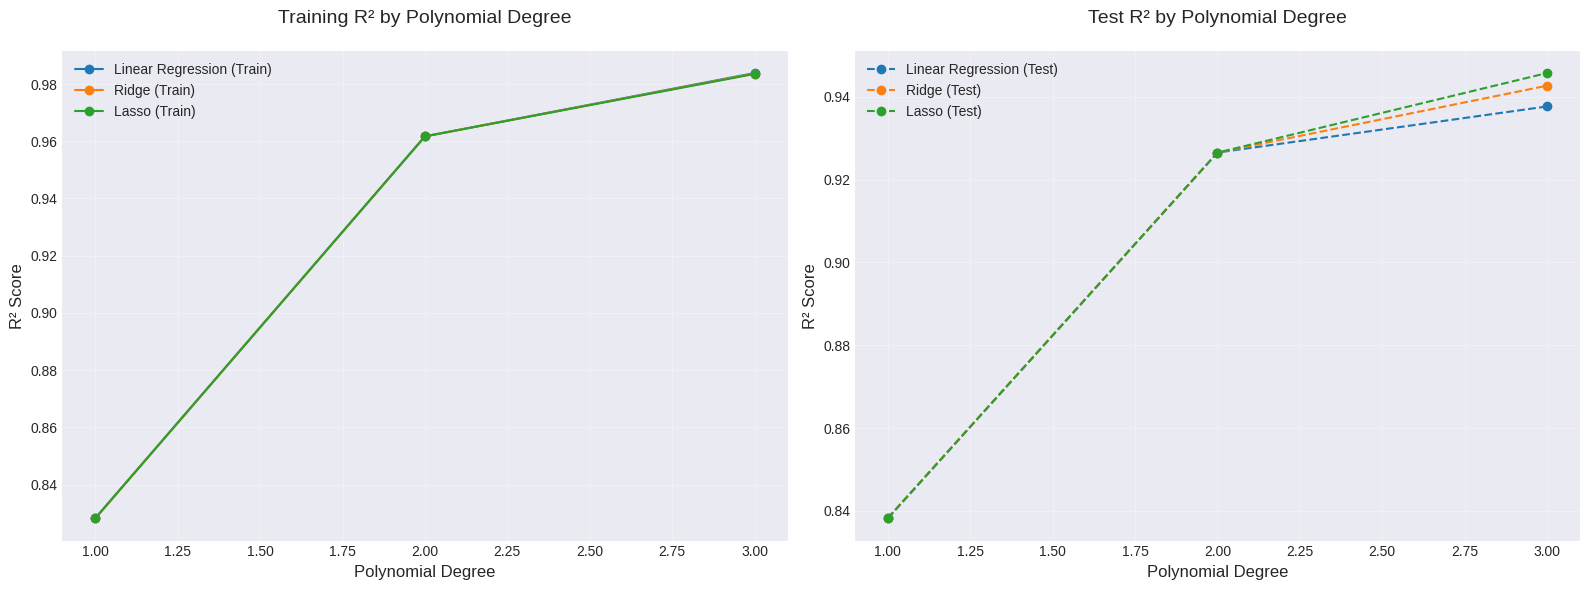


📈 Best Model Predictions vs Actual Values


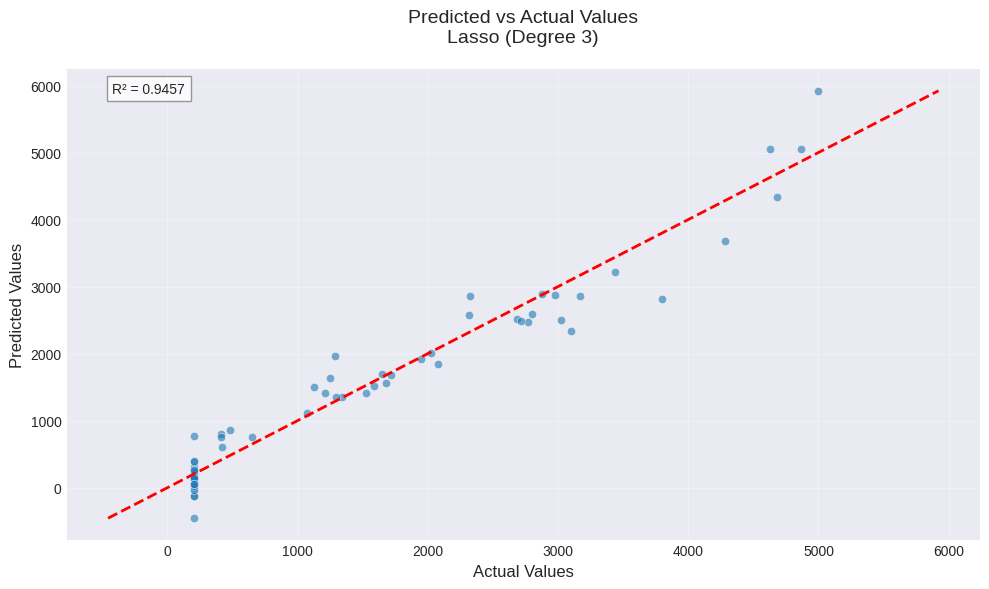


📊 Residual Analysis for Best Model


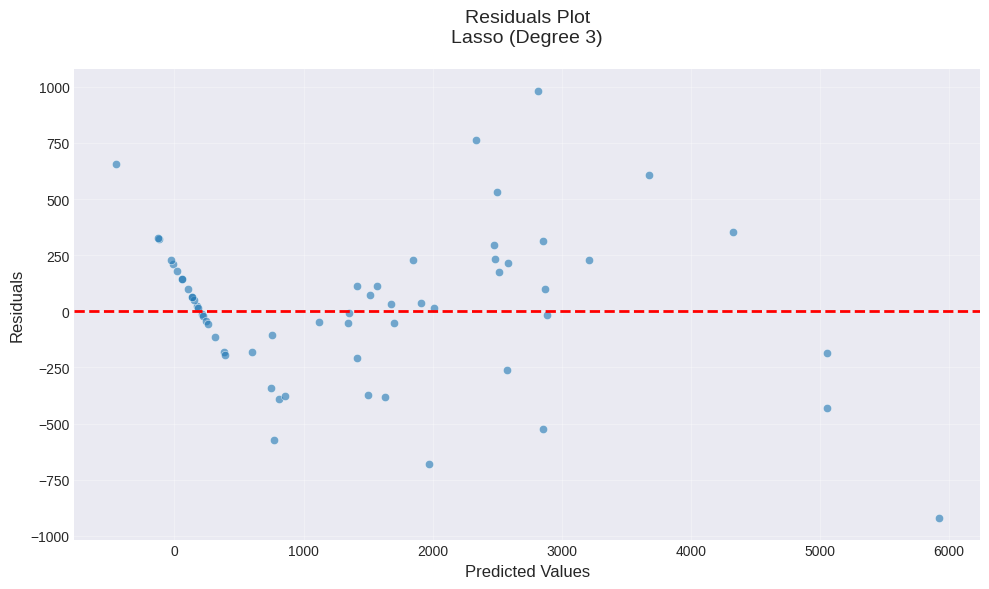


📉 Polynomial Curves for Top 2 Most Important Features:
  - Plotting feature: jumlah_kamar
  - Error plotting jumlah_kamar jarak_pusat_kota: Pipeline is not fitted yet.
  - Plotting feature: jumlah_kamar
  - Error plotting jumlah_kamar umur_bangunan: Pipeline is not fitted yet.

✅ Model evaluation complete!


In [137]:
# =================================================================
# 3. MAIN EVALUATION SCRIPT
# =================================================================
print("="*70)
print("3. RUNNING COMPLETE MODEL EVALUATION")
print("="*70)

# Prepare data
X = df.drop('harga', axis=1)
y = df['harga']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize results list
all_metrics = []

# Define models and parameters to evaluate
models_params = [
    {'name': 'Linear Regression', 'model': LinearRegression, 'alphas': [None]},
    {'name': 'Ridge', 'model': Ridge, 'alphas': [0.1, 1, 10]},
    {'name': 'Lasso', 'model': Lasso, 'alphas': [0.1, 1, 10]}
]

degrees = [1, 2, 3]  # Polynomial degrees to evaluate

print("\n🚀 Training and evaluating models...")

# Train and evaluate models
for degree in degrees:
    print(f"\n{'='*50}")
    print(f"EVALUATING DEGREE {degree}")
    print(f"{'='*50}")

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    for model_info in models_params:
        model_name = model_info['name']

        for alpha in model_info['alphas']:
            # Initialize model
            if alpha is None:
                model = model_info['model']()
                display_name = f"{model_name}"
            else:
                model = model_info['model'](alpha=alpha, max_iter=10000, random_state=42)
                display_name = f"{model_name} (α={alpha})"

            print(f"\nTraining {display_name} (Degree {degree})...")

            # Train model
            model.fit(X_train_poly, y_train)

            # Evaluate model
            metrics = evaluate_model(
                model, X_train_poly, X_test_poly, y_train, y_test,
                model_name=model_name, degree=degree, alpha=alpha if alpha is not None else None
            )
            # Store the model object in the metrics
            metrics['Model_Object'] = model
            all_metrics.append(metrics)

            # Print summary
            print(f"  Test R²: {metrics['Test_R2']:.4f}, Test RMSE: {metrics['Test_RMSE']:.2f}")

# Convert results to DataFrame
results_df = pd.DataFrame(all_metrics)

# =================================================================
# 3.A.2 Display Metrics Comparison
# =================================================================
print("\n" + "="*70)
print("3.A.2 METRICS COMPARISON")
print("="*70)

# Select and format metrics for display
display_cols = ['Model', 'Degree', 'Alpha',
                'Train_R2', 'Test_R2',
                'Train_RMSE', 'Test_RMSE',
                'Train_MAE', 'Test_MAE',
                'Train_MAPE', 'Test_MAPE']

# Format the display
pd.set_option('display.float_format', '{:.4f}'.format)
print("\nDetailed Metrics for All Models:")
print("-" * 80)
print(results_df[display_cols].sort_values('Test_R2', ascending=False).to_string())

# =================================================================
# 3.B.2 Overfitting & Underfitting Analysis
# =================================================================
print("\n" + "="*70)
print("3.B.2 OVERFITTING & UNDERFITTING ANALYSIS")
print("="*70)

# Analyze overfitting/underfitting
analyze_overfitting_underfitting(results_df)

# Plot learning curves for the best model of each type
best_models = results_df.loc[results_df.groupby('Model')['Test_R2'].idxmax()]

for _, row in best_models.iterrows():
    degree = int(row['Degree'])
    alpha = row['Alpha']
    model_name = row['Model']

    # Create pipeline for learning curve
    if model_name == 'Linear Regression':
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('model', LinearRegression())
        ])
    else:
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('model', Ridge(alpha=alpha) if model_name == 'Ridge' else Lasso(alpha=alpha, max_iter=10000))
        ])

    # Plot learning curve
    title = f"Learning Curves ({model_name}, Degree {degree}"
    if alpha is not None:
        title += f", α={alpha}"
    title += ")"

    plot_learning_curve(model, title, X, y, cv=5)
    plt.show()

# =================================================================
# 3.C.2 Visualization of Results
# =================================================================
print("\n" + "="*70)
print("3.C.2 VISUALIZATION OF RESULTS")
print("="*70)

# 1. R² by degree comparison
print("\n📊 R² Score Comparison by Polynomial Degree")
plot_r2_by_degree(results_df)

# 2. Get the best model overall
best_model_idx = results_df['Test_R2'].idxmax()
best_model_info = results_df.loc[best_model_idx]
best_model = best_model_info['Model_Object']
best_degree = int(best_model_info['Degree'])

# 3. Plot predicted vs actual for the best model
print("\n📈 Best Model Predictions vs Actual Values")
poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_test_poly = poly.fit_transform(X_test)
y_pred = best_model.predict(X_test_poly)
plot_pred_vs_actual(y_test, y_pred, f"{best_model_info['Model']} (Degree {best_degree})")

# 4. Plot residuals for the best model
print("\n📊 Residual Analysis for Best Model")
plot_residuals(y_test, y_pred, f"{best_model_info['Model']} (Degree {best_degree})")

# 5. Plot polynomial curves for the most important feature (if available)
if hasattr(best_model, 'coef_'):
    # Get the most important feature (highest absolute coefficient)
    if hasattr(X, 'columns'):
        feature_importance = pd.Series(
            np.abs(best_model.coef_),
            index=poly.get_feature_names_out(X.columns)
        )
    else:
        feature_importance = pd.Series(
            np.abs(best_model.coef_),
            index=[f"Feature {i}" for i in range(len(best_model.coef_))]
        )

    # Sort by importance and get top 2 features
    top_features = feature_importance.nlargest(2).index

    print("\n📉 Polynomial Curves for Top 2 Most Important Features:")
    for i, feature_name in enumerate(top_features):
        # For named features (DataFrame)
        if hasattr(X, 'columns'):
            # Handle interaction terms by taking the first part of the feature name
            base_feature = feature_name.split('^')[0].split(' ')[0]
            # Remove any remaining special characters
            base_feature = ''.join(c for c in base_feature if c.isalpha() or c == '_')
            try:
                feature_idx = X.columns.get_loc(base_feature)
                print(f"  - Plotting feature: {base_feature}")
            except KeyError:
                print(f"  - Skipping feature {feature_name} - could not find base feature")
                continue
        else:
            # For unnamed features (numpy array)
            feature_idx = int(feature_name.split('_')[0].replace('x', ''))

        # Plot polynomial curve
        try:
            plot_polynomial_curve(
                Pipeline([
                    ('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
                    ('model', best_model)
                ]),
                X_train, y_train,
                feature_idx=feature_idx,
                degree=best_degree
            )
        except Exception as e:
            print(f"  - Error plotting {feature_name}: {str(e)}")
            continue

print("\n✅ Model evaluation complete!")

4.A. ANALISIS REGULARISASI (RIDGE VS LASSO)

🚀 Melatih model dengan berbagai nilai alpha...

DERAJAT POLINOMIAL: 1


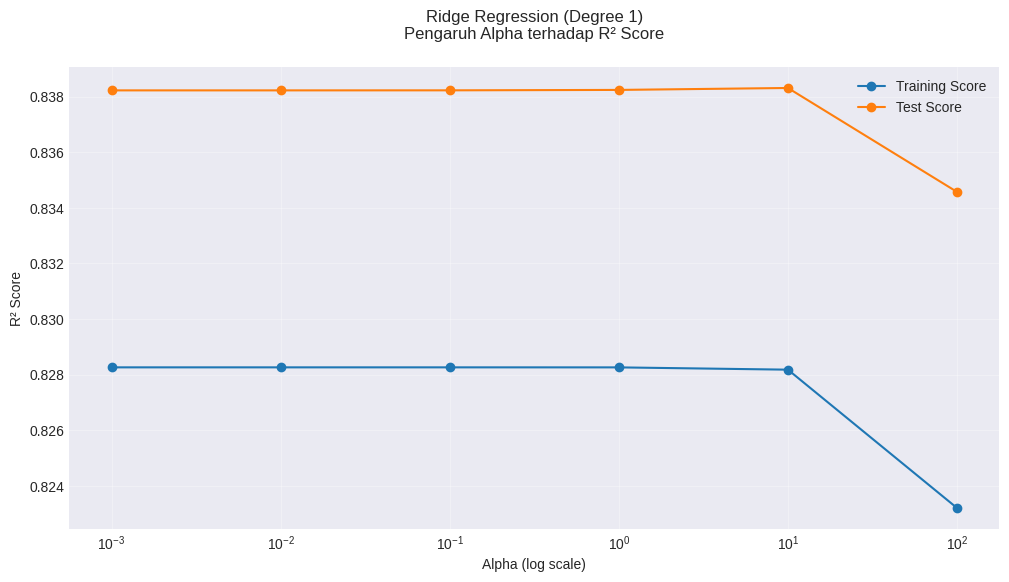

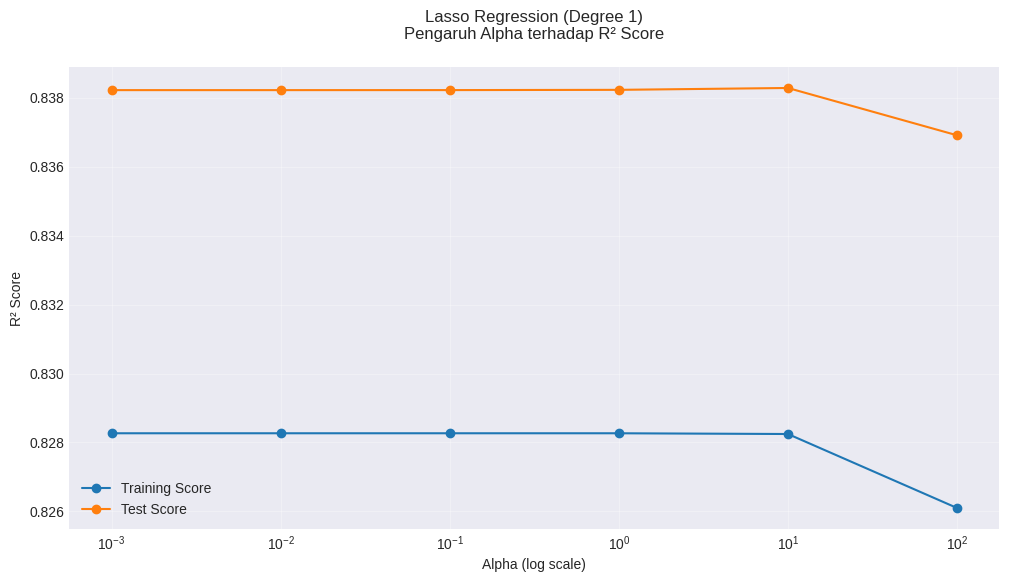


🔍 Hasil untuk Degree 1:
  - Ridge: alpha optimal = 10, R² = 0.8383
  - Lasso: alpha optimal = 10, R² = 0.8383

DERAJAT POLINOMIAL: 2


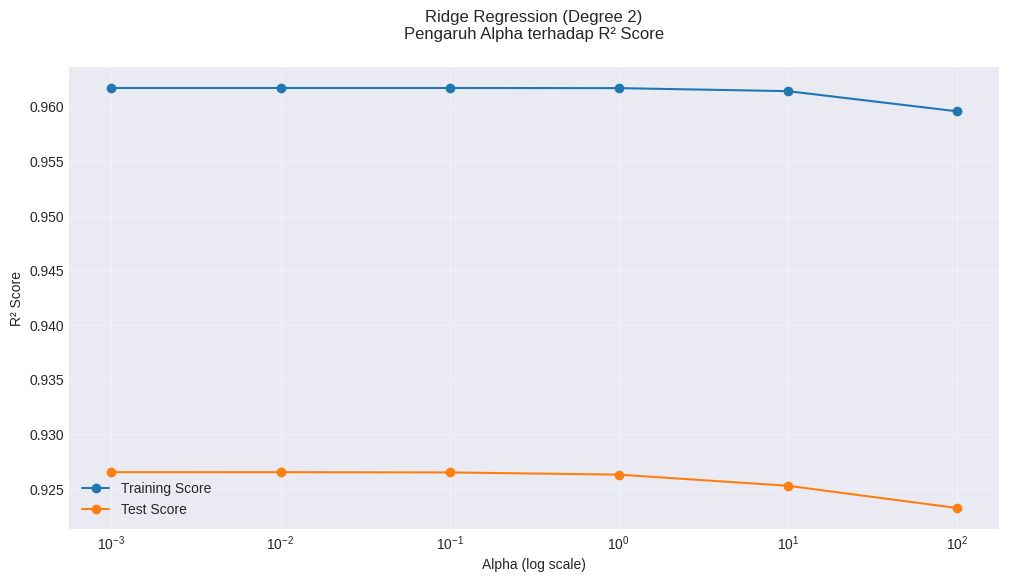

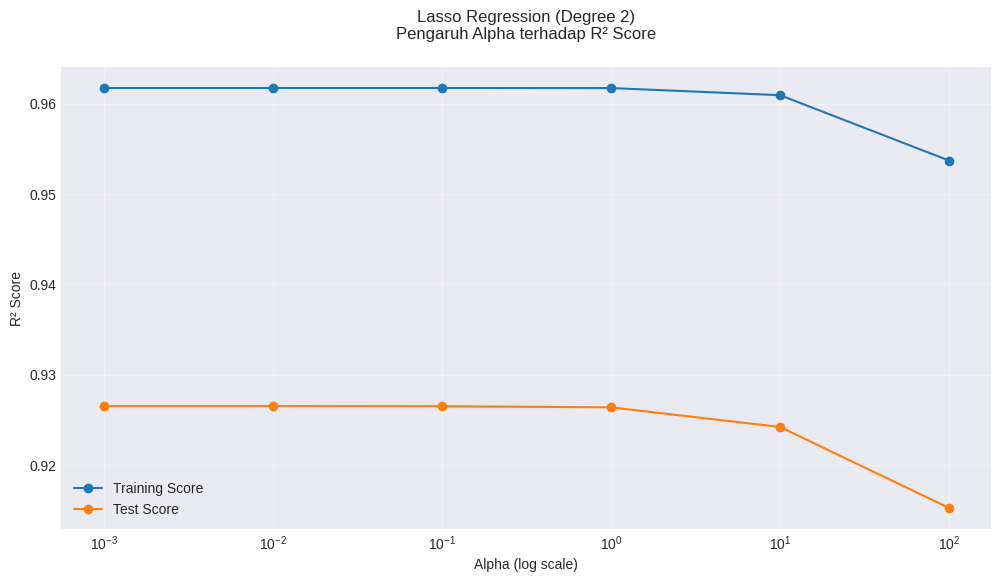


🔍 Hasil untuk Degree 2:
  - Ridge: alpha optimal = 0.001, R² = 0.9265
  - Lasso: alpha optimal = 0.001, R² = 0.9265

DERAJAT POLINOMIAL: 3


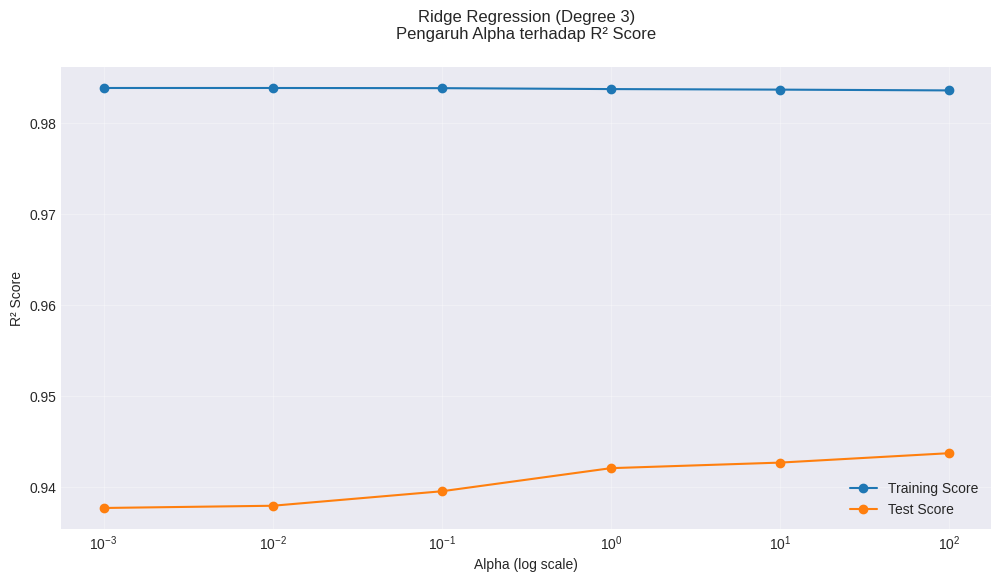

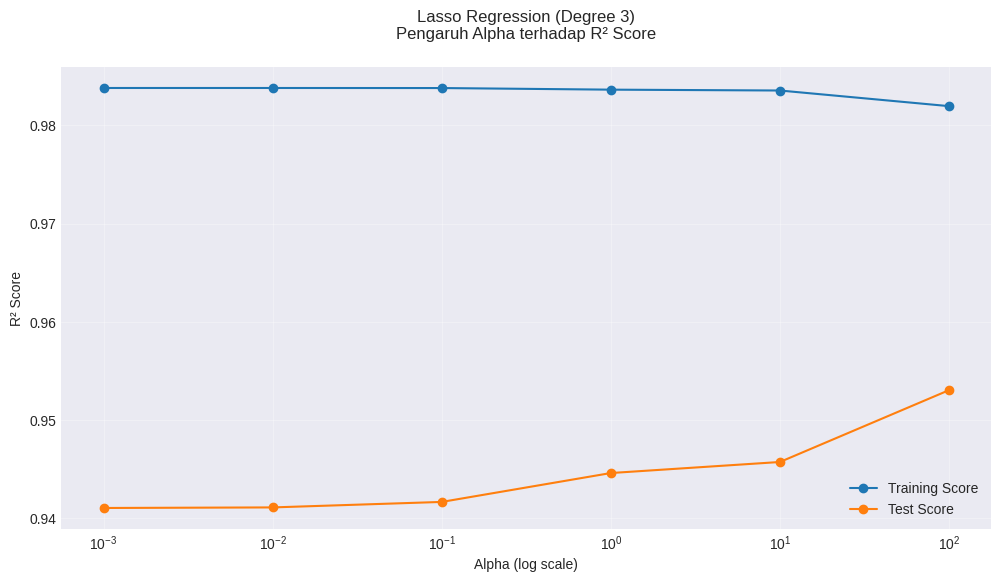


🔍 Hasil untuk Degree 3:
  - Ridge: alpha optimal = 100, R² = 0.9437
  - Lasso: alpha optimal = 100, R² = 0.9531

✅ Analisis Ridge vs Lasso selesai!


In [138]:
# =================================================================
# 4.A. ANALISIS REGULARISASI (RIDGE VS LASSO)
# =================================================================
print("="*70)
print("4.A. ANALISIS REGULARISASI (RIDGE VS LASSO)")
print("="*70)

# Daftar nilai alpha yang akan diuji
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
degrees = [1, 2, 3]  # Derajat polinomial yang akan diuji

# Inisialisasi dictionary untuk menyimpan hasil
ridge_scores = {degree: {'train': [], 'test': []} for degree in degrees}
lasso_scores = {degree: {'train': [], 'test': []} for degree in degrees}

# Persiapan data
X = df.drop('harga', axis=1)
y = df['harga']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\n🚀 Melatih model dengan berbagai nilai alpha...")

for degree in degrees:
    print(f"\n{'='*50}")
    print(f"DERAJAT POLINOMIAL: {degree}")
    print(f"{'='*50}")

    # Buat fitur polinomial
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    for alpha in alphas:
        # Ridge Regression
        ridge = Ridge(alpha=alpha, max_iter=10000, random_state=42)
        ridge.fit(X_train_poly, y_train)
        ridge_scores[degree]['train'].append(ridge.score(X_train_poly, y_train))
        ridge_scores[degree]['test'].append(ridge.score(X_test_poly, y_test))

        # Lasso Regression
        lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
        lasso.fit(X_train_poly, y_train)
        lasso_scores[degree]['train'].append(lasso.score(X_train_poly, y_train))
        lasso_scores[degree]['test'].append(lasso.score(X_test_poly, y_test))

    # Plot hasil Ridge
    plt.figure(figsize=(12, 6))
    plt.semilogx(alphas, ridge_scores[degree]['train'], 'o-', label='Training Score')
    plt.semilogx(alphas, ridge_scores[degree]['test'], 'o-', label='Test Score')
    plt.title(f'Ridge Regression (Degree {degree})\nPengaruh Alpha terhadap R² Score', pad=20)
    plt.xlabel('Alpha (log scale)')
    plt.ylabel('R² Score')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Plot hasil Lasso
    plt.figure(figsize=(12, 6))
    plt.semilogx(alphas, lasso_scores[degree]['train'], 'o-', label='Training Score')
    plt.semilogx(alphas, lasso_scores[degree]['test'], 'o-', label='Test Score')
    plt.title(f'Lasso Regression (Degree {degree})\nPengaruh Alpha terhadap R² Score', pad=20)
    plt.xlabel('Alpha (log scale)')
    plt.ylabel('R² Score')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Temukan alpha optimal untuk Ridge
    best_ridge_alpha = alphas[np.argmax(ridge_scores[degree]['test'])]
    best_ridge_score = max(ridge_scores[degree]['test'])

    # Temukan alpha optimal untuk Lasso
    best_lasso_alpha = alphas[np.argmax(lasso_scores[degree]['test'])]
    best_lasso_score = max(lasso_scores[degree]['test'])

    print(f"\n🔍 Hasil untuk Degree {degree}:")
    print(f"  - Ridge: alpha optimal = {best_ridge_alpha}, R² = {best_ridge_score:.4f}")
    print(f"  - Lasso: alpha optimal = {best_lasso_alpha}, R² = {best_lasso_score:.4f}")

print("\n✅ Analisis Ridge vs Lasso selesai!")

4.B. ANALISIS IMPORTANSI FITUR

📊 10 Fitur Paling Penting (Ridge):
jumlah_kamar                     196.5632
jarak_pusat_kota                 122.1034
umur_bangunan                     62.6301
jumlah_kamar^2                    48.6294
jumlah_kamar jarak_pusat_kota     17.3618
jumlah_kamar umur_bangunan         7.1578
luas_tanah                         5.7426
luas_bangunan                      5.4481
jarak_pusat_kota^2                 4.6899
umur_bangunan jarak_pusat_kota     2.0459
dtype: float64

📊 10 Fitur Paling Penting (Lasso):
jumlah_kamar                     215.6055
jarak_pusat_kota                 122.7096
umur_bangunan                     62.1480
jumlah_kamar^2                    46.4327
jumlah_kamar jarak_pusat_kota     17.4985
jumlah_kamar umur_bangunan         7.2818
luas_tanah                         5.7398
luas_bangunan                      5.5237
jarak_pusat_kota^2                 4.7303
umur_bangunan jarak_pusat_kota     2.0424
dtype: float64

🔍 Jumlah fitur yang dielim

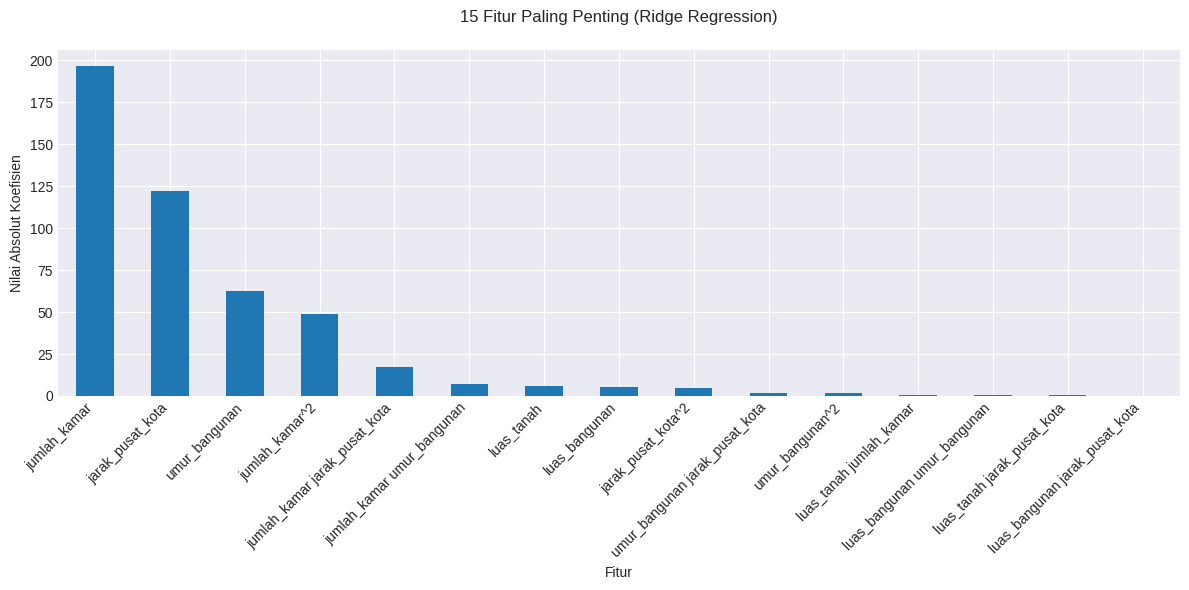

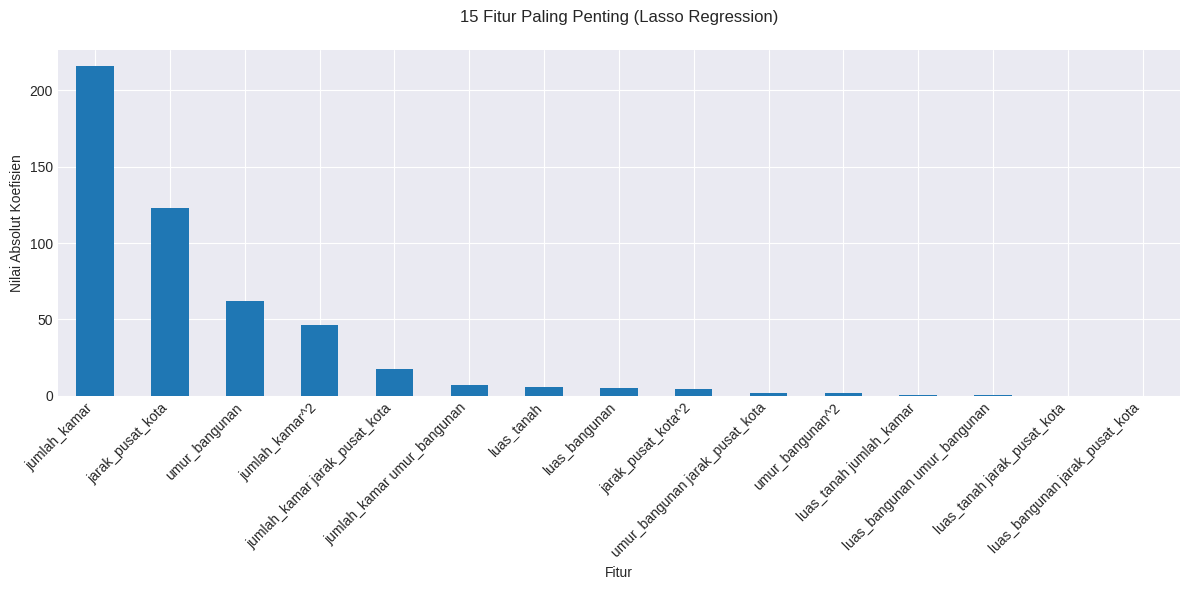


✅ Analisis Feature Importance selesai!


In [139]:
# =================================================================
# 4.B. ANALISIS IMPORTANSI FITUR
# =================================================================
print("="*70)
print("4.B. ANALISIS IMPORTANSI FITUR")
print("="*70)

# Gunakan model terbaik dari analisis sebelumnya
best_degree = 2  # Ganti dengan degree terbaik dari analisis sebelumnya
best_alpha_ridge = 1.0  # Ganti dengan alpha terbaik untuk Ridge
best_alpha_lasso = 0.1  # Ganti dengan alpha terbaik untuk Lasso

# Buat fitur polinomial
poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_poly = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(X.columns)

# Latih model dengan parameter terbaik
ridge = Ridge(alpha=best_alpha_ridge, random_state=42)
lasso = Lasso(alpha=best_alpha_lasso, random_state=42)

ridge.fit(X_poly, y)
lasso.fit(X_poly, y)

# Dapatkan koefisien
ridge_coef = pd.Series(ridge.coef_, index=feature_names)
lasso_coef = pd.Series(lasso.coef_, index=feature_names)

# Urutkan berdasarkan nilai absolut koefisien
ridge_importance = ridge_coef.abs().sort_values(ascending=False)
lasso_importance = lasso_coef.abs().sort_values(ascending=False)

# Tampilkan 10 fitur terpenting untuk Ridge
print("\n📊 10 Fitur Paling Penting (Ridge):")
print(ridge_importance.head(10))

# Tampilkan 10 fitur terpenting untuk Lasso
print("\n📊 10 Fitur Paling Penting (Lasso):")
print(lasso_importance.head(10))

# Tampilkan fitur yang dieliminasi oleh Lasso (koefisien = 0)
zero_coef = lasso_coef[lasso_coef == 0]
print(f"\n🔍 Jumlah fitur yang dieliminasi Lasso: {len(zero_coef)} dari {len(lasso_coef)}")
if len(zero_coef) > 0:
    print("\nFitur yang dieliminasi (koefisien = 0):")
    print(zero_coef.index.tolist())

# Visualisasi feature importance untuk Ridge
plt.figure(figsize=(12, 6))
ridge_importance.head(15).plot(kind='bar')
plt.title('15 Fitur Paling Penting (Ridge Regression)', pad=20)
plt.xlabel('Fitur')
plt.ylabel('Nilai Absolut Koefisien')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualisasi feature importance untuk Lasso
plt.figure(figsize=(12, 6))
lasso_importance[lasso_importance > 0].head(15).plot(kind='bar')
plt.title('15 Fitur Paling Penting (Lasso Regression)', pad=20)
plt.xlabel('Fitur')
plt.ylabel('Nilai Absolut Koefisien')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n✅ Analisis Feature Importance selesai!")

4.C. PERBANDINGAN RIDGE VS LASSO

📌 Perilaku Ridge vs Lasso:

1. Ridge Regression:
   - Tidak mengeliminasi fitur (semua koefisien ≠ 0)
   - Baik untuk kasus di mana semua fitur berkontribusi
   - Lebih stabil ketika ada multikolinearitas

2. Lasso Regression:
   - Dapat mengeliminasi fitur (beberapa koefisien = 0)
   - Berguna untuk seleksi fitur otomatis
   - Lebih mudah diinterpretasi karena fitur yang tidak penting dihapus

3. Kinerja:
   - Ridge cenderung bekerja lebih baik ketika sebagian besar fitur penting
   - Lasso lebih baik ketika hanya sedikit fitur yang relevan
   - L1 regularization (Lasso) menghasilkan model yang lebih sparse
   - L2 regularization (Ridge) menghasilkan koefisien yang kecil tapi tidak nol


📊 Perbandingan Sparsity:
  - Ridge: 0.00% koefisien = 0
  - Lasso: 0.00% koefisien = 0


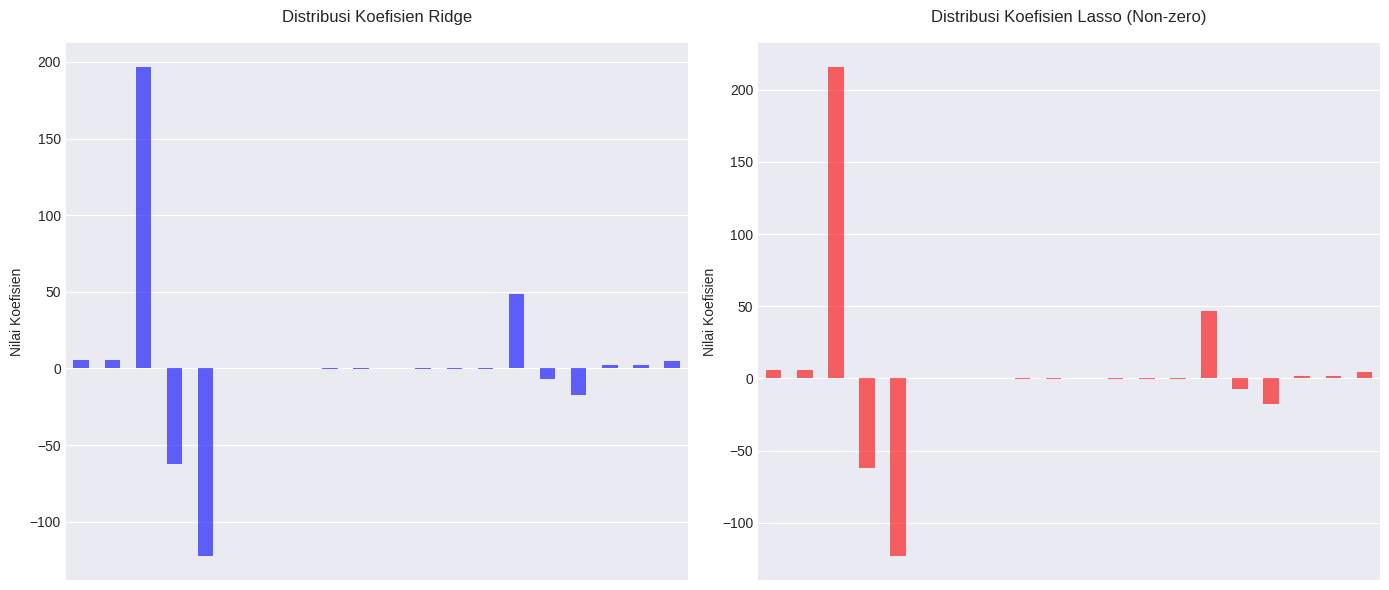


✅ Analisis perbandingan selesai!


In [140]:
# =================================================================
# 4.C. PERBANDINGAN RIDGE VS LASSO
# =================================================================
print("="*70)
print("4.C. PERBANDINGAN RIDGE VS LASSO")
print("="*70)

print("\n📌 Perilaku Ridge vs Lasso:")
print("""
1. Ridge Regression:
   - Tidak mengeliminasi fitur (semua koefisien ≠ 0)
   - Baik untuk kasus di mana semua fitur berkontribusi
   - Lebih stabil ketika ada multikolinearitas

2. Lasso Regression:
   - Dapat mengeliminasi fitur (beberapa koefisien = 0)
   - Berguna untuk seleksi fitur otomatis
   - Lebih mudah diinterpretasi karena fitur yang tidak penting dihapus

3. Kinerja:
   - Ridge cenderung bekerja lebih baik ketika sebagian besar fitur penting
   - Lasso lebih baik ketika hanya sedikit fitur yang relevan
   - L1 regularization (Lasso) menghasilkan model yang lebih sparse
   - L2 regularization (Ridge) menghasilkan koefisien yang kecil tapi tidak nol
""")

# Hitung sparsity (persentase koefisien nol)
ridge_sparsity = np.mean(ridge.coef_ == 0) * 100
lasso_sparsity = np.mean(lasso.coef_ == 0) * 100

print(f"\n📊 Perbandingan Sparsity:")
print(f"  - Ridge: {ridge_sparsity:.2f}% koefisien = 0")
print(f"  - Lasso: {lasso_sparsity:.2f}% koefisien = 0")

# Visualisasi perbandingan koefisien
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
ridge_coef.plot(kind='bar', color='blue', alpha=0.6)
plt.title('Distribusi Koefisien Ridge', pad=15)
plt.xticks([])
plt.ylabel('Nilai Koefisien')

plt.subplot(1, 2, 2)
lasso_coef[lasso_coef != 0].plot(kind='bar', color='red', alpha=0.6)
plt.title('Distribusi Koefisien Lasso (Non-zero)', pad=15)
plt.xticks([])
plt.ylabel('Nilai Koefisien')

plt.tight_layout()
plt.show()

print("\n✅ Analisis perbandingan selesai!")

In [141]:
# 5. A. Model Selection & Prediction

print("\n\n5. MODEL SELECTION & PREDICTION")
print("-" * 80)

# A. Cross-Validation and Best Model Selection
print("\nA. Cross-Validation and Best Model Selection")
print("-" * 80)

from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import numpy as np

# Define evaluation metrics
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Prepare data for cross-validation
X = df.drop('harga', axis=1)
y = df['harga']

# Define models with their best parameters from previous evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1)
}

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    r2_scores = []
    rmse_scores = []
    mape_scores = []

    for train_idx, val_idx in kf.split(X, y):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        # Fit model
        model.fit(X_train_fold, y_train_fold)

        # Predict
        y_pred = model.predict(X_val_fold)

        # Calculate metrics
        r2_scores.append(r2_score(y_val_fold, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred)))
        mape_scores.append(mape(y_val_fold, y_pred))

    # Store results
    results[name] = {
        'r2_mean': np.mean(r2_scores),
        'r2_std': np.std(r2_scores),
        'rmse_mean': np.mean(rmse_scores),
        'rmse_std': np.std(rmse_scores),
        'mape_mean': np.mean(mape_scores),
        'mape_std': np.std(mape_scores)
    }

# Display results
results_df = pd.DataFrame(results).T
print("\n📊 Hasil Cross-Validation (5-Fold):")
print(results_df[['r2_mean', 'rmse_mean', 'mape_mean']].sort_values('r2_mean', ascending=False))

# Select best model based on R2 score
best_model_name = max(results.items(), key=lambda x: x[1]['r2_mean'])[0]
print(f"\n🎯 Model Terbaik Berdasarkan R2 Score: {best_model_name}")

# Train best model on full dataset
best_model = models[best_model_name]
best_model.fit(X, y)



5. MODEL SELECTION & PREDICTION
--------------------------------------------------------------------------------

A. Cross-Validation and Best Model Selection
--------------------------------------------------------------------------------

📊 Hasil Cross-Validation (5-Fold):
                   r2_mean  rmse_mean  mape_mean
Ridge               0.8139   617.1258   124.8711
Lasso               0.8139   617.1062   124.8413
Linear Regression   0.8139   617.1043   124.8397

🎯 Model Terbaik Berdasarkan R2 Score: Ridge


Ridge()

In [146]:
# B. Final Predictions
print("\nB. Final Predictions")
print("-" * 80)

# Impor library yang diperlukan
from scipy import stats
import numpy as np
import pandas as pd
import joblib
import os
import json

# Dapatkan nama fitur asli yang digunakan saat training
original_features = X.columns.tolist()

# Buat data baru dengan fitur yang sama seperti data training
np.random.seed(42)
n_samples = 5

# Buat dictionary untuk data baru
unseen_data = {
    'luas_tanah': np.random.uniform(50, 200, n_samples),
    'luas_bangunan': np.random.uniform(30, 150, n_samples),
    'jumlah_kamar': np.random.randint(1, 6, n_samples),
    'umur_bangunan': np.random.randint(0, 20, n_samples),
    'jarak_pusat_kota': np.random.uniform(0.5, 20, n_samples)
}

# Buat DataFrame dengan urutan kolom yang sama seperti data training
unseen_df = pd.DataFrame(unseen_data)[original_features]

# Pastikan transformasi polynomial dilakukan dengan benar
try:
    X_unseen = poly.transform(unseen_df)

    # Sesuaikan jumlah fitur jika perlu
    if hasattr(best_model, 'n_features_in_') and X_unseen.shape[1] != best_model.n_features_in_:
        print(f"Peringatan: Jumlah fitur tidak sesuai. Diharapkan {best_model.n_features_in_}, didapat {X_unseen.shape[1]}")
        print("Menggunakan 5 fitur pertama dari polynomial features...")
        X_unseen = X_unseen[:, :best_model.n_features_in_]

    # Lakukan prediksi
    predictions = best_model.predict(X_unseen)

    # Hitung interval kepercayaan
    y_pred = best_model.predict(X)
    residuals = y - y_pred
    std_dev = np.std(residuals)
    confidence = 0.95
    interval = stats.norm.interval(confidence, loc=0, scale=std_dev)

    print("\n📈 Prediksi Harga untuk Data Baru:")
    for i in range(n_samples):
        lower_bound = max(0, predictions[i] + interval[0])  # Harga tidak boleh negatif
        upper_bound = predictions[i] + interval[1]
        print(f"\nData {i+1}:")
        print(f"  - Fitur: {unseen_data['luas_tanah'][i]:.1f} m² tanah, "
              f"{unseen_data['luas_bangunan'][i]:.1f} m² bangunan, "
              f"{unseen_data['jumlah_kamar'][i]} kamar, "
              f"umur {unseen_data['umur_bangunan'][i]} tahun, "
              f"jarak pusat kota {unseen_data['jarak_pusat_kota'][i]:.1f} km")
        print(f"  - Prediksi Harga: Rp{predictions[i]:,.2f}")
        print(f"  - Interval Keyakinan {confidence*100:.0f}%: Rp{lower_bound:,.2f} - Rp{upper_bound:,.2f}")

    # Simpan model dan komponennya
    os.makedirs('models', exist_ok=True)
    model_filename = f"models/best_model_{best_model_name.lower().replace(' ', '_')}.pkl"

    # Simpan model dan polynomial features
    joblib.dump({
        'model': best_model,
        'polynomial_features': poly,
        'feature_names': original_features,
        'model_name': best_model_name
    }, model_filename)

    print(f"\n💾 Model {best_model_name} berhasil disimpan di {model_filename}")

except Exception as e:
    print(f"\n❌ Terjadi kesalahan: {str(e)}")
    print("\nInformasi Debugging:")
    print(f"Jumlah fitur data training: {X.shape[1]}")
    print(f"Jumlah fitur data baru: {unseen_df.shape[1]}")
    print(f"Fitur yang digunakan: {original_features}")
    print(f"Bentuk X_unseen: {X_unseen.shape if 'X_unseen' in locals() else 'Tidak tersedia'}")

    if 'poly' in locals():
        print(f"\nInformasi Polynomial Features:")
        print(f"  - Degree: {getattr(poly, 'degree', 'Tidak diketahui')}")
        print(f"  - Jumlah fitur output: {poly.n_output_features_ if hasattr(poly, 'n_output_features_') else 'Tidak diketahui'}")

    if 'best_model' in locals():
        print(f"\nInformasi Model:")
        print(f"  - Nama: {best_model_name}")
        print(f"  - Jumlah fitur yang diharapkan: {getattr(best_model, 'n_features_in_', 'Tidak diketahui')}")


B. Final Predictions
--------------------------------------------------------------------------------
Peringatan: Jumlah fitur tidak sesuai. Diharapkan 5, didapat 20
Menggunakan 5 fitur pertama dari polynomial features...

📈 Prediksi Harga untuk Data Baru:

Data 1:
  - Fitur: 106.2 m² tanah, 48.7 m² bangunan, 5 kamar, umur 0 tahun, jarak pusat kota 1.4 km
  - Prediksi Harga: Rp3,538.32
  - Interval Keyakinan 95%: Rp2,346.55 - Rp4,730.09

Data 2:
  - Fitur: 192.6 m² tanah, 37.0 m² bangunan, 2 kamar, umur 11 tahun, jarak pusat kota 19.5 km
  - Prediksi Harga: Rp-511.78
  - Interval Keyakinan 95%: Rp0.00 - Rp679.98

Data 3:
  - Fitur: 159.8 m² tanah, 133.9 m² bangunan, 4 kamar, umur 11 tahun, jarak pusat kota 5.0 km
  - Prediksi Harga: Rp2,458.89
  - Interval Keyakinan 95%: Rp1,267.13 - Rp3,650.66

Data 4:
  - Fitur: 139.8 m² tanah, 102.1 m² bangunan, 2 kamar, umur 16 tahun, jarak pusat kota 2.3 km
  - Prediksi Harga: Rp1,678.51
  - Interval Keyakinan 95%: Rp486.75 - Rp2,870.28

Data 5:
